<a href="https://colab.research.google.com/github/datascience-uniandes/eda-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

**Proyecto Comercial Química**
Universidad de los Andes
Ciencia de Datos Aplicada

Andrés Mauricio Martínez Celis &nbsp;  &nbsp; &nbsp;     202322624 <br>
Danilo Andrés Alfonso Bohórquez  &nbsp;      201611827 <br>
Jairo Vladimir Chaparro Rodríguez     201531080 <br>
Oscar Duvan Giraldo Romero  &nbsp; &nbsp;&nbsp; &nbsp;&nbsp;  202324939   <br>  


Last update: September, 2023

In [1]:
# Importamos todas las librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from matplotlib.image import imread
import plotly.graph_objs as go
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import calendar
import requests
import matplotlib.dates as mdates
from geopy.geocoders import Nominatim
from random import randint
from datetime import datetime
from difflib import SequenceMatcher

In [2]:
# Configuramos pandas para obtener el número de filas y columnas necesarias 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

#Quitamos los mensajes de advertencia

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### ENTENDIMIENTO INICIAL DE LOS DATOS 

## 1. Loading the data (cargamos los datasets necesarios)

In [3]:
# Cargamos los datasets necesarios para nuestro análisis de datos de ventas
datos_ventas = pd.read_excel("Archivos/base_ventas.xlsx")

## PRE-PROCESAMIENTO DE LOS DATOS

# Dataset datos_ventas

In [4]:
datos_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   factura                  9171 non-null   int64         
 1   fecha_contabilización    9171 non-null   datetime64[ns]
 2   nombre_cliente           9171 non-null   object        
 3   nombre_empleado_cliente  9171 non-null   object        
 4   descripcion_articulo     9171 non-null   object        
 5   via_administracion       9171 non-null   object        
 6   presentacion_medica      9171 non-null   object        
 7   cantidad_regulacion      9171 non-null   object        
 8   lote                     9008 non-null   object        
 9   ciudad                   9171 non-null   object        
 10  departamento             9171 non-null   object        
 11  cantidad                 9171 non-null   float64       
 12  precio_unitario          9171 non-

In [5]:
# Mostramos las dimensiones de nuestro dataframe 
datos_ventas.shape

(9171, 17)

In [6]:
#Información de los datos
print('\nFilas : ',datos_ventas.shape[0]) #número de filas
print('\nColumnas :', datos_ventas.shape[1]) #número de columnas
print('\nColumnas:',datos_ventas.columns.to_list()) #lista de columnas
print(' \nÚnicos:\n',datos_ventas.nunique()) #número de términos únicos por variable


Filas :  9171

Columnas : 17

Columnas: ['factura', 'fecha_contabilización', 'nombre_cliente', 'nombre_empleado_cliente', 'descripcion_articulo', 'via_administracion', 'presentacion_medica', 'cantidad_regulacion', 'lote', 'ciudad', 'departamento', 'cantidad', 'precio_unitario', 'total_lineas', 'Impuesto_total', 'precio_final', 'numero_referencia_SN']
 
Únicos:
 factura                    7139
fecha_contabilización       819
nombre_cliente              299
nombre_empleado_cliente      10
descripcion_articulo        207
via_administracion            6
presentacion_medica          10
cantidad_regulacion           5
lote                       1749
ciudad                       48
departamento                 25
cantidad                    470
precio_unitario             664
total_lineas               1836
Impuesto_total              365
precio_final               2111
numero_referencia_SN       4970
dtype: int64


In [7]:
# Observamos la cantidad de columnas con valores nulos

percentage_result = datos_ventas.isnull().sum()/datos_ventas.shape[0] * 100
# Creamos un DataFrame para mostrar los resultados
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

columns         %
0                   factura  0.000000
1     fecha_contabilización  0.000000
2            nombre_cliente  0.000000
3   nombre_empleado_cliente  0.000000
4      descripcion_articulo  0.000000
5        via_administracion  0.000000
6       presentacion_medica  0.000000
7       cantidad_regulacion  0.000000
8                      lote  1.777342
9                    ciudad  0.000000
10             departamento  0.000000
11                 cantidad  0.000000
12          precio_unitario  0.000000
13             total_lineas  0.000000
14           Impuesto_total  0.000000
15             precio_final  0.000000
16     numero_referencia_SN  0.752372

In [8]:
#Las variables de lote y numero_referencia_SN tienen nulos, sin embargo, debido a que no son necesarias para el análisis las eliminamos de nuestro dataframe
datos_ventas.drop(["lote","numero_referencia_SN"], axis=1, inplace=True)

In [9]:
datos_ventas.head(5)

factura fecha_contabilización                           nombre_cliente  \
0    36674            2020-09-25          DUARTE RODRIGUEZ WILLIAM MOISES   
1    36031            2020-06-12                        COASPHARMA S.A.S.   
2    36031            2020-06-12                        COASPHARMA S.A.S.   
3    39690            2022-03-01              BELL CHEM INTERNACIONAL SAS   
4    37250            2020-12-17  LABORATORIOS ROLDY VETERINARIA LIMITADA   

           nombre_empleado_cliente                      descripcion_articulo  \
0  JONATHAN ANDRES HERNANDEZ PRADA                        CIPROFLOXACINA HCL   
1     JENNY MAGALY GONZALEZ FLOREZ                           DIPIRONA SODICA   
2     JENNY MAGALY GONZALEZ FLOREZ           OXITETRACICLINA BASE INYECTABLE   
3       LINA PAOLA CRISOSTOMO DIAZ  VITAMINA E ALFA TOCOFEROL ACETATO (BASF)   
4  JONATHAN ANDRES HERNANDEZ PRADA                              NICOTINAMIDA   

  via_administracion presentacion_medica cantidad_regulacion  ciudad  \
0               Oral             Tableta                  mg  BOGOTÁ   
1               Oral             Ampolla                  ml  BOGOTÁ   
2         Inyectable       Solución Oral                  ml  BOGOTÁ   
3               Oral       Solución Oral                  ml  BOGOTÁ   
4               Oral             Tableta                  mg  BOGOTÁ   

  departamento  cantidad  precio_unitario  total_lineas  Impuesto_total  \
0       BOGOTA     150.0         125000.0    18750000.0             0.0   
1       BOGOTA      75.0          55000.0     4125000.0             0.0   
2       BOGOTA     200.0         240000.0    48000000.0             0.0   
3       BOGOTA      25.0         120000.0     3000000.0             0.0   
4       BOGOTA      50.0          34000.0     1700000.0             0.0   

   precio_final  
0    18750000.0  
1     4125000.0  
2    48000000.0  
3     3000000.0  
4     1700000.0

In [10]:
#Realizamos la transformación de variables númericas que en realidad son variables categóricas


try:
    data = datos_ventas.astype({'factura':'str'})
except:
    next
    
data.dtypes

factura                            object
fecha_contabilización      datetime64[ns]
nombre_cliente                     object
nombre_empleado_cliente            object
descripcion_articulo               object
via_administracion                 object
presentacion_medica                object
cantidad_regulacion                object
ciudad                             object
departamento                       object
cantidad                          float64
precio_unitario                   float64
total_lineas                      float64
Impuesto_total                    float64
precio_final                      float64
dtype: object

In [11]:
## Analisis estadistico de los datos númericos
# Calcular las estadísticas descriptivas
descripcion = data.describe()

# Formatear la salida para evitar notación científica y especificar el número de decimales
estadisticas = descripcion.applymap('{:.2f}'.format)

print(estadisticas)

      cantidad precio_unitario   total_lineas Impuesto_total   precio_final
count  9171.00         9171.00        9171.00        9171.00        9171.00
mean    117.35       420610.74    16525684.02      227809.67    16753493.69
std     231.49      1204162.29    88282089.25     1333625.33    88358607.90
min       0.01            5.00          10.00           0.00          10.00
25%      25.00        82000.00     3100000.00           0.00     3125000.00
50%      50.00       170000.00     7000000.00           0.00     7020000.00
75%     100.00       310000.00    18000000.00           0.00    18400000.00
max    5000.00     30000000.00  6116709168.00    37050000.00  6116709168.00


Podemos observar que las cantidades máximas vendidas a los clientes son de alrededor de 5000 en una única transacción. Mientras que los precios de estas transacciones tienen algunos valores desorbitados que habría que revisar en la muestra y el análisis de precios en específico.

# Análisis Ciudades

In [12]:
#Realizamos el conteo de las ciudades que existen que existen
category_counts = data['ciudad'].value_counts()
print("Frecuencia de cada categoría:")
print(category_counts)

Frecuencia de cada categoría:
BOGOTÁ           5171
YUMBO             980
TOCANCIPA         572
FUNZA             407
COTA              274
BUCARAMANGA       219
ZIPAQUIRA         199
SOPÓ              168
CALI              116
GIRON             108
MEDELLÍN          106
SAN PEDRO          98
TENJO              96
VILLAVICENCIO      87
JAMUNDÍ            86
SABANETA           67
IBAGUÉ             51
FLORIDABLANCA      48
GUARNE             35
IPIALES            30
BARRANQUILLA       28
RIONEGRO           25
ITAGUI             19
CARTAGENA          19
ARMENIA            16
TURBO              15
VILLA RICA         14
CUENCA             13
CHIA               12
LA ESTRELLA        11
PEREIRA            10
CÚCUTA             10
SANTA MARTA         8
BUENAVENTURA        8
PAMPLONA            7
LA CAPILLA          5
SINCELEJO           5
ARMENIA             5
VÉLEZ               4
MISTRATÓ            3
FUSAGASUGÁ          3
CARACAS             3
SOACHA              3
POPAYÁN             2
MA

In [13]:
#Revisamos cuál es la proporción que existe para cada una de las ciudades
category_proportions = data['ciudad'].value_counts(normalize=True)
print("Proporción de cada categoría:")
print(category_proportions)

Proporción de cada categoría:
BOGOTÁ           0.563843
YUMBO            0.106859
TOCANCIPA        0.062371
FUNZA            0.044379
COTA             0.029877
BUCARAMANGA      0.023880
ZIPAQUIRA        0.021699
SOPÓ             0.018319
CALI             0.012649
GIRON            0.011776
MEDELLÍN         0.011558
SAN PEDRO        0.010686
TENJO            0.010468
VILLAVICENCIO    0.009486
JAMUNDÍ          0.009377
SABANETA         0.007306
IBAGUÉ           0.005561
FLORIDABLANCA    0.005234
GUARNE           0.003816
IPIALES          0.003271
BARRANQUILLA     0.003053
RIONEGRO         0.002726
ITAGUI           0.002072
CARTAGENA        0.002072
ARMENIA          0.001745
TURBO            0.001636
VILLA RICA       0.001527
CUENCA           0.001418
CHIA             0.001308
LA ESTRELLA      0.001199
PEREIRA          0.001090
CÚCUTA           0.001090
SANTA MARTA      0.000872
BUENAVENTURA     0.000872
PAMPLONA         0.000763
LA CAPILLA       0.000545
SINCELEJO        0.000545
ARMENIA 

Como podemos observar alrededor del 66% de los proveedores a los cuales Comercial Quimica les vende materias primas, se encuentran ubicados en dos ciudades principales las cuales son Bogotá y Yumbo

**Agregamos las longitudes y latitudes de las ciudades de nuestra muestra**

In [14]:
def obtener_coordenadas_ciudad(nombre_ciudad):
    geolocator = Nominatim(user_agent="mi_aplicacion")

    # Establecer la verificación SSL
    verify_ssl = True  # Puedes cambiar esto a False si es necesario

    # URL de la API de Nominatim
    url = f"https://nominatim.openstreetmap.org/search?q={nombre_ciudad}&format=json&limit=1"

    try:
        # Realizar la solicitud con la verificación SSL
        response = requests.get(url, verify=verify_ssl)
        if response.status_code == 200:
            data = response.json()
            if data:
                # Obtener la latitud y longitud
                latitud = float(data[0]['lat'])
                longitud = float(data[0]['lon'])
                return latitud, longitud
            else:
                print(f"No se pudo encontrar la ubicación de {nombre_ciudad}")
                return None
        else:
            print(f"Error al obtener la ubicación de {nombre_ciudad}. Código de estado: {response.status_code}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Error de solicitud: {e}")
        return None

# Obtener las ciudades únicas de la serie 'ciudad'
ciudades_unicas = data['ciudad'].unique()

# Iterar sobre las ciudades únicas y obtener las coordenadas para cada una
for nombre_ciudad in ciudades_unicas:
    # Obtener las coordenadas de la ciudad
    coordenadas = obtener_coordenadas_ciudad(nombre_ciudad)
        
# Crear una lista para almacenar los resultados
resultados = []

# Iterar sobre las ciudades únicas y obtener las coordenadas para cada una
for nombre_ciudad in ciudades_unicas:
    # Obtener las coordenadas de la ciudad
    coordenadas = obtener_coordenadas_ciudad(nombre_ciudad)
    
    if coordenadas:
        # Agregar el resultado a la lista
        resultados.append({'ciudad': nombre_ciudad, 'latitud': coordenadas[0], 'longitud': coordenadas[1]})
    else:
        resultados.append({'ciudad': nombre_ciudad, 'latitud': None, 'longitud': None})

# Convertir la lista de resultados en un DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar el DataFrame con las coordenadas
print(df_resultados)


           ciudad    latitud   longitud
0          BOGOTÁ   4.652954 -74.083564
1          ITAGUI   6.172435 -75.609325
2          IBAGUÉ   4.439170 -75.211327
3       TOCANCIPA   4.973710 -73.921180
4        MEDELLÍN   6.244338 -75.573553
5           YUMBO   3.583466 -76.495222
6        SABANETA   6.138750 -75.612775
7           GIRON  46.224829   5.772912
8            COTA   4.809362 -74.101574
9     BUCARAMANGA   7.125517 -73.118262
10        JAMUNDÍ   3.261836 -76.540797
11          FUNZA   4.716304 -74.212221
12      CARTAGENA  10.426675 -75.544342
13      ZIPAQUIRA   5.023475 -74.003982
14           CALI   3.452034 -76.532935
15        IPIALES   0.823693 -77.634930
16     SAN PEDRO   43.254110  -3.097637
17           SOPÓ   4.893144 -73.953414
18           BUGA  51.534757  23.564682
19           CHIA  38.910571   8.881850
20  FLORIDABLANCA   7.062536 -73.085823
21   BARRANQUILLA  11.010192 -74.823179
22       RIONEGRO   6.153617 -75.374169
23          TENJO   4.827454 -74.152985


In [15]:
data= pd.merge(data, df_resultados, on='ciudad')

In [16]:
data.head(15)

factura fecha_contabilización  \
0    36674            2020-09-25   
1    36031            2020-06-12   
2    36031            2020-06-12   
3    39690            2022-03-01   
4    37250            2020-12-17   
5    36767            2020-10-08   
6    35425            2020-02-18   
7    36284            2020-07-27   
8    36571            2020-09-15   
9    36062            2020-06-18   
10   36015            2020-06-10   
11   36921            2020-11-05   
12   37433            2021-02-01   
13   35986            2020-06-05   
14   35374            2020-02-10   

                                       nombre_cliente  \
0                     DUARTE RODRIGUEZ WILLIAM MOISES   
1                                   COASPHARMA S.A.S.   
2                                   COASPHARMA S.A.S.   
3                         BELL CHEM INTERNACIONAL SAS   
4             LABORATORIOS ROLDY VETERINARIA LIMITADA   
5                          JIR PRODUCTOS QUIMICOS SAS   
6                        LABORATORIOS TIERWELT S.A.S.   
7                                          VECOL S.A.   
8   CARIBBEAN SUNRISE LABORATORIOS M&F CHEMICAL´ S...   
9                                   COASPHARMA S.A.S.   
10       IMPORTADORA Y DISTRIBUIDORA DE SUMISTROS SAS   
11                       LABORATORIOS TIERWELT S.A.S.   
12   GVM CORPORATION GLOBAL VETERINARY MEDICINE S A S   
13              BIOCHEM FARMACEUTICA DE COLOMBIA S.A.   
14                                      OPTI-VET LTDA   

             nombre_empleado_cliente  \
0    JONATHAN ANDRES HERNANDEZ PRADA   
1       JENNY MAGALY GONZALEZ FLOREZ   
2       JENNY MAGALY GONZALEZ FLOREZ   
3         LINA PAOLA CRISOSTOMO DIAZ   
4    JONATHAN ANDRES HERNANDEZ PRADA   
5         LINA PAOLA CRISOSTOMO DIAZ   
6    JONATHAN ANDRES HERNANDEZ PRADA   
7     YENNY PATRICIA MORALES BENITEZ   
8   VICTOR ALEJANDRO VACA CASTRILLON   
9       JENNY MAGALY GONZALEZ FLOREZ   
10      JENNY MAGALY GONZALEZ FLOREZ   
11  VICTOR ALEJANDRO VACA CASTRILLON   
12  VICTOR ALEJANDRO VACA CASTRILLON   
13      JENNY MAGALY GONZALEZ FLOREZ   
14   JONATHAN ANDRES HERNANDEZ PRADA   

                        descripcion_articulo via_administracion  \
0                         CIPROFLOXACINA HCL               Oral   
1                            DIPIRONA SODICA               Oral   
2            OXITETRACICLINA BASE INYECTABLE         Inyectable   
3   VITAMINA E ALFA TOCOFEROL ACETATO (BASF)               Oral   
4                               NICOTINAMIDA               Oral   
5                        PAMOATO DE PIRANTEL               Oral   
6                                 ANTIPIRINA              Bucal   
7                 TRICLABENDAZOL MICRONIZADO               Oral   
8                           MENTOL CRISTALES               Oral   
9                         PAMOATO DE OXANTEL               Oral   
10                        PAMOATO DE OXANTEL               Oral   
11                    ALBENDAZOL MICRONIZADO               Oral   
12                    TILMICOSIN FOSFATO 75%      Intramuscular   
13                   TYLOSINA TARTRATO POLVO               Oral   
14                           AMITRAZ TECNICO               Oral   

   presentacion_medica cantidad_regulacion  ciudad departamento  cantidad  \
0              Tableta                  mg  BOGOTÁ       BOGOTA     150.0   
1              Ampolla                  ml  BOGOTÁ       BOGOTA      75.0   
2        Solución Oral                  ml  BOGOTÁ       BOGOTA     200.0   
3        Solución Oral                  ml  BOGOTÁ       BOGOTA      25.0   
4              Tableta                  mg  BOGOTÁ       BOGOTA      50.0   
5              Tableta                  mg  BOGOTÁ       BOGOTA      20.0   
6               Frasco                  ml  BOGOTÁ       BOGOTA      25.0   
7              Tableta                  mg  BOGOTÁ       BOGOTA      75.0   
8               Frasco                  mg  BOGOTÁ       BOGOTA      25.0   
9              Tableta       

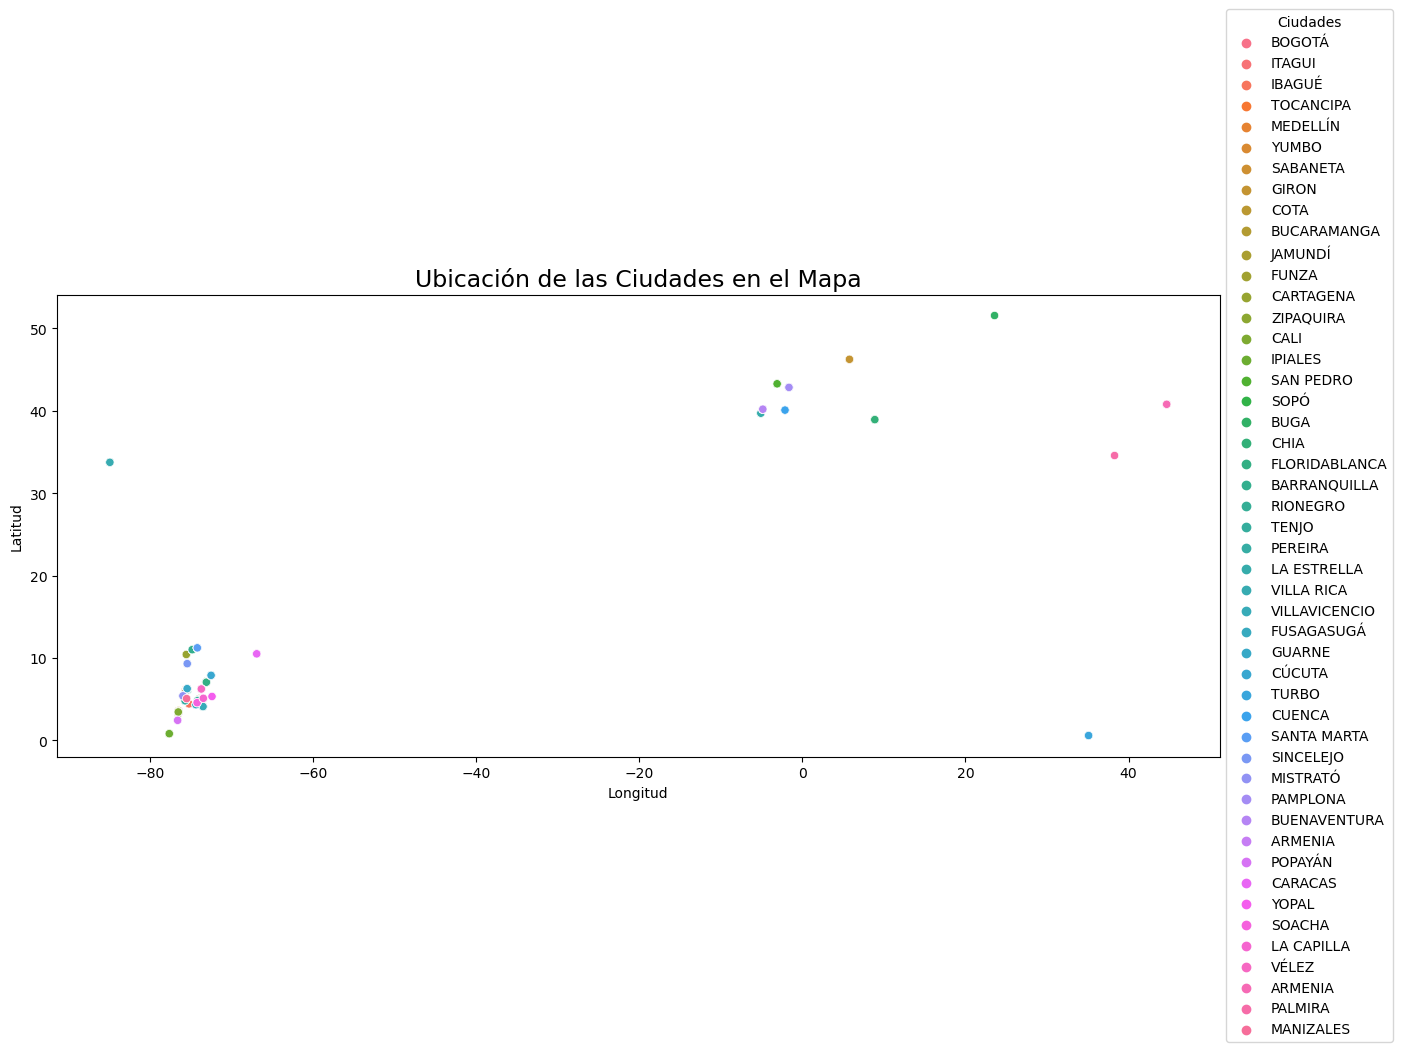

In [17]:
# Crear una figura
plt.figure(figsize=(15, 6))

# Gráfico de dispersión
scatter_plot = sns.scatterplot(x=data.longitud, y=data.latitud, hue=data.ciudad)

# Configurar título y etiquetas
plt.title('Ubicación de las Ciudades en el Mapa',fontsize=17)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Ajustar la leyenda para que aparezca a la derecha
scatter_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Ciudades')

# Mostrar el gráfico
plt.show()


La mayor parte de las empresas se encuentran ubicadas en zonas geográficas comunes, como lo son Cundinamarca y Antioquía.

# Análisis Univariado Precios

In [18]:
# Calcular las estadísticas descriptivas
descripcion = data['precio_final'].describe()

# Formatear la salida para evitar notación científica y especificar el número de decimales
estadisticas = descripcion.apply(lambda x: '{:.2f}'.format(x))

print(estadisticas)

count          9171.00
mean       16753493.69
std        88358607.90
min              10.00
25%         3125000.00
50%         7020000.00
75%        18400000.00
max      6116709168.00
Name: precio_final, dtype: object


In [19]:
#Validamos el rango de los precios para verificar en primer lugar los valores atípicos
range_age = data['precio_final'].max() - data['precio_final'].min()
print("Rango de los precios:", range_age)

Rango de los precios: 6116709158.0


La diferencia entre el precio máximo y el precio minimo es de alrededor de 6116.709.158 pesos colombianos, lo que nos conlleva a revisar los precios más altos de la muestra ya que posiblemente sean outliers, sin embargo, lo validaremos más adelante 
en el desarrollo de la estrategia.

In [20]:
# Ordenar la columna 'precio_final' de forma descendente y aplicar formato
sorted_precio_final = data["precio_final"].sort_values(ascending=False).apply(lambda x: '{:,.2f}'.format(x))

# Imprimir la columna 'precio_final' ordenada
print(sorted_precio_final)

1139    6,116,709,168.00
8572    5,469,915,000.00
1816      255,000,000.00
5217      232,050,000.00
3267      225,000,000.00
              ...       
6083            2,600.00
6349            2,500.00
6082            1,750.00
5192               11.90
8108               10.00
Name: precio_final, Length: 9171, dtype: object


Como se puede evidenciar existen dos precios de venta desorbitados, por lo cual podemos considerarlos outliers, sin embargo, los validaremos en un grafico de box plot y un histograma.

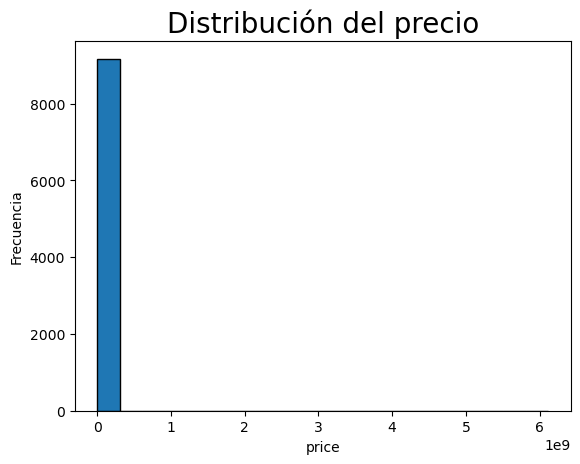

In [21]:
plt.hist(data['precio_final'], bins=20, edgecolor='k')
plt.title('Distribución del precio',fontsize=20)
plt.xlabel('price')
plt.ylabel('Frecuencia')
plt.show()

Como se puede observar en el histograma los precios se encuentran desorbitados por lo cual se debe realizar un procesamiento que permita quitar los valores atípicos y de esa manera realizar la normalización de la muestra.

# Valores Atípicos Precios

In [22]:
# Calcular el rango, mínimo, máximo y promedio de los precios en pesos colombianos
precio_min = data['precio_final'].min()
precio_max = data['precio_final'].max()
precio_promedio = data['precio_final'].mean()

# Formatear los valores para imprimirlos sin notación científica
precio_min_str = '{:,.2f}'.format(precio_min)
precio_max_str = '{:,.2f}'.format(precio_max)
precio_promedio_str = '{:,.2f}'.format(precio_promedio)

# Imprimir el rango, mínimo, máximo y promedio de precios en pesos colombianos
print("- El rango de precios en pesos colombianos va de un mínimo de {} hasta un máximo de {}, y su promedio es {}".format(precio_min_str, precio_max_str, precio_promedio_str))


- El rango de precios en pesos colombianos va de un mínimo de 10.00 hasta un máximo de 6,116,709,168.00, y su promedio es 16,753,493.69


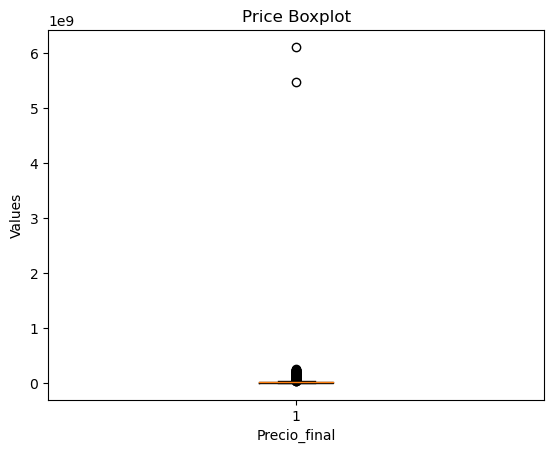

In [23]:
# Corroboramos con el gráfico boxplot para ver estos precios desorbitados muy alejados de la realidad.
plt.boxplot(data = data, x= "precio_final")
plt.title('Price Boxplot')
plt.xlabel('Precio_final')
plt.ylabel('Values')
plt.show()

Como se puede observar existen dos precios desorbitados en nuestro gráfico, por lo cual procedemos a normalizar nuestra muestra.

In [24]:
# Trataremos los precios desorbitados como errores y procedemos a limpiar los valores atípicos para la columna precio_final.

def eliminar_outliers_columna(dataset, columna):
    # Calcular los cuartiles
    Q1 = dataset[columna].quantile(0.25)
    Q3 = dataset[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Identificar los outliers
    outliers = (dataset[columna] < (Q1 - 4 * IQR)) | (dataset[columna] > (Q3 + 4 * IQR))
    
    # Eliminar los outliers
    dataset_sin_outliers = dataset[~outliers]
    return dataset_sin_outliers

In [25]:
data= eliminar_outliers_columna(data, "precio_final")

In [26]:
# Calcular las estadísticas descriptivas
descripcion = data['precio_final'].describe()

# Formatear la salida para evitar notación científica y especificar el número de decimales
estadisticas = descripcion.apply(lambda x: '{:.2f}'.format(x))

print(estadisticas)

count        8939.00
mean     12915144.66
std      14965581.88
min            10.00
25%       3055000.00
50%       6750000.00
75%      16875000.00
max      79184000.00
Name: precio_final, dtype: object


Como podemos observar con la aplicación de la normalización a dicha muestra, el precio máximo por una transacción es de 79.184.000 y la transacción más baja es de 10 pesos, asimismo, se puede evidenciar que el precio promedio por transacción es de 12.915.144

**Toda está información en pesos colombianos**

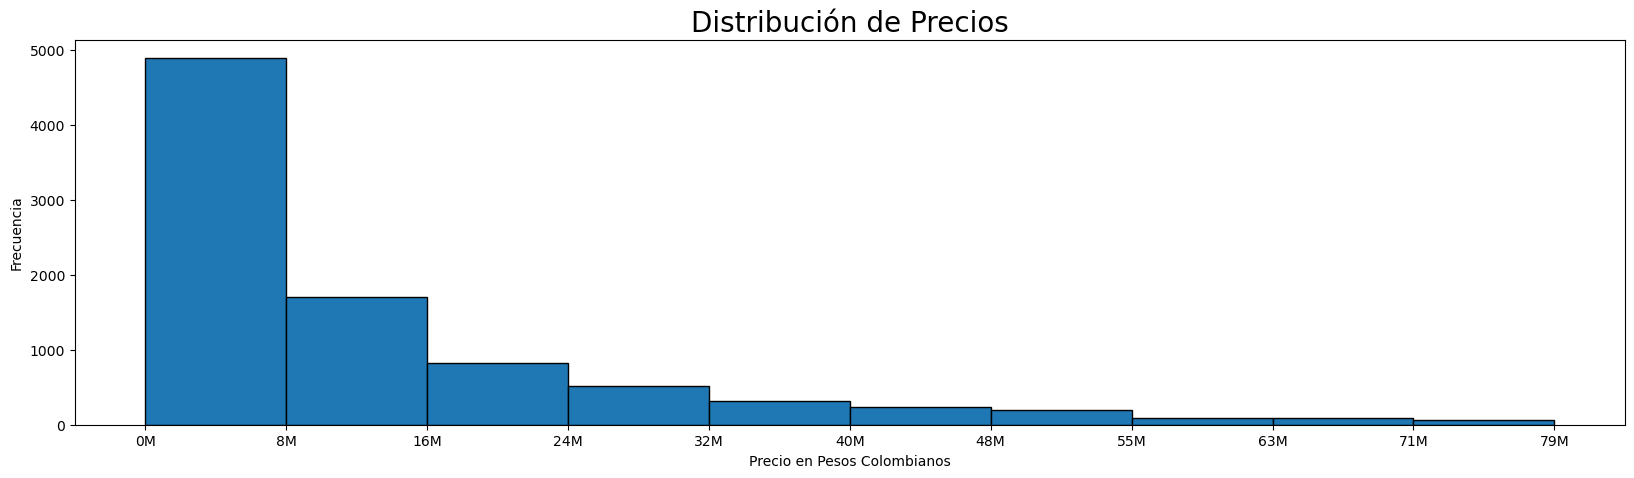

In [27]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Asegúrate de que 'data["precio_final"]' sea de tipo numérico (float)
data["precio_final"] = data["precio_final"].astype(float)

plt.figure(figsize=(20, 5))
plt.hist(data["precio_final"], bins=10, edgecolor='black')  # Especifica la columna "precio_final" y agrega bordes
plt.title("Distribución de Precios",fontsize=20)
plt.xlabel("Precio en Pesos Colombianos")
plt.ylabel("Frecuencia")

# Función para formatear las etiquetas del eje x en millones (M)
def millones_formatter(x, pos):
    'The two args are the value and tick position'
    return f'{x/1e6:.0f}M'

# Especifica los límites y los valores del eje x
precios_min = data["precio_final"].min()
precios_max = data["precio_final"].max()
plt.xticks(range(int(precios_min), int(precios_max)+1, int((precios_max - precios_min)/10)))

# Aplica el formato de millones a las etiquetas del eje x
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(millones_formatter))

plt.show()



La concentración de los precios por cada una de las transacciones se encuentra entre los 10 pesos y los 8 millones, no obstante, podemos encontrar transacciones que oscilen alrededor de los 80 millones.

**Toda esta información en pesos colombianos**

In [28]:
data.shape

(8939, 17)

Después de extraer los outliers de los precios que son desorbitados nuestro dataset pasa de 9171 a 8.313 registros

In [29]:
data.dtypes

factura                            object
fecha_contabilización      datetime64[ns]
nombre_cliente                     object
nombre_empleado_cliente            object
descripcion_articulo               object
via_administracion                 object
presentacion_medica                object
cantidad_regulacion                object
ciudad                             object
departamento                       object
cantidad                          float64
precio_unitario                   float64
total_lineas                      float64
Impuesto_total                    float64
precio_final                      float64
latitud                           float64
longitud                          float64
dtype: object

# Correlación entre variables

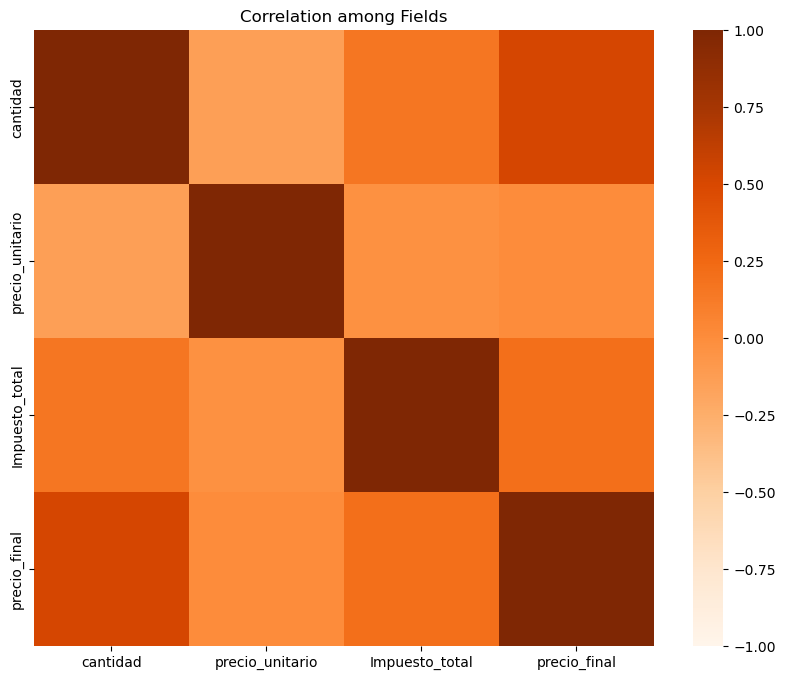

In [30]:
# Validamos la correlación entre las variables especificas.
plt.figure(figsize=(10, 8))
sns.heatmap(
    data[["cantidad","precio_unitario","Impuesto_total","precio_final"]].corr(),
    vmin=-1, vmax=1,
    cmap="Oranges"
)
plt.title("Correlation among Fields")
plt.show()

Como se puede observar en la matriz las variables que tienen una mayor correlación son los precios y las cantidades lo cual tiene sentido ya que a medida que aumentan las cantidades aumenta el precio.No obstante, Lo validaremos con el test de correlación de Sperman-

In [31]:
from scipy.stats import spearmanr

stat, p = spearmanr(data["precio_final"], data["cantidad"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.653, p=0.000
Probablemente dependientes


In [32]:
# Y aquí lo comprobamos gráficamente
fig = px.scatter(data, x = "precio_final", y = "cantidad", trendline = "ols", trendline_color_override="#ff8000")
fig.show()

Podemos observar que efectivamente los precios y las cantidades tienen una correlación directa ya a que medida que aumenta las cantidades vendidas aumentan los precios de los productos lo cual de cierta manera es común, sin embargo no es una relación estrictamente fuerte lo que sugiere que el precio está influido de igual manera por otros factores.

   # Medicamentos con mayor cantidad de ventas

In [33]:

# Agrupar por descripción del artículo y sumar las cantidades
productos_agrupados = data.groupby('descripcion_articulo')['cantidad'].sum().reset_index()

# Ordenar por cantidad de forma descendente y obtener los primeros 20 registros
top_20_productos = productos_agrupados.sort_values(by='cantidad', ascending=False).head(20)

# Mostrar los 20 productos con más cantidades
print(top_20_productos)

                       descripcion_articulo  cantidad
199  VITAMINA C - ACIDO ASCORBICO CRISTALES   88450.0
134                            NICOTINAMIDA   45679.5
35                     CIPERMETRINA TECNICA   39740.0
71           ETHION TECNICO (PI INDUSTRIES)   37500.0
163                    SALICILATO DE METILO   35125.0
3                   ACIDO ACETIL SALICILICO   32575.7
16                               ANTIPIRINA   31774.8
58                          DIPIRONA SODICA   31375.0
70                  ETHION TECNICO (HEMANI)   25500.0
38                       CIPROFLOXACINA HCL   24226.0
27                          CAFEINA ANHIDRA   23489.0
99      HIERRO DEXTRAN SOLUCION ESTERIL 10%   22662.0
141          OXITETRACICLINA HCL INYECTABLE   19850.0
139         OXITETRACICLINA BASE INYECTABLE   19260.0
93                      GLUCONATO DE CALCIO   19125.0
77        FENBENDAZOL MICRONIZADO (ALIVIRA)   18650.0
7                    ALBENDAZOL MICRONIZADO   16975.0
9                           

Los medicamentos más demandados son la vitamina C y la Nicotinamida con alrededor de 88k y 45k unidades vendidas desde 2020 hasta agosto de 2023, por lo que es relevante que en nuestro análisis se pueda determinar cuales son los índices de rotación actuales para evaluar si es un tema de demanda potencial o simplemente gran cantidad de stock.

# Medicamentos con el precio Unitario más alto

Text(0.5, 1.0, 'Top 20 Productos con Mayor Precio Promedio por Unidad')

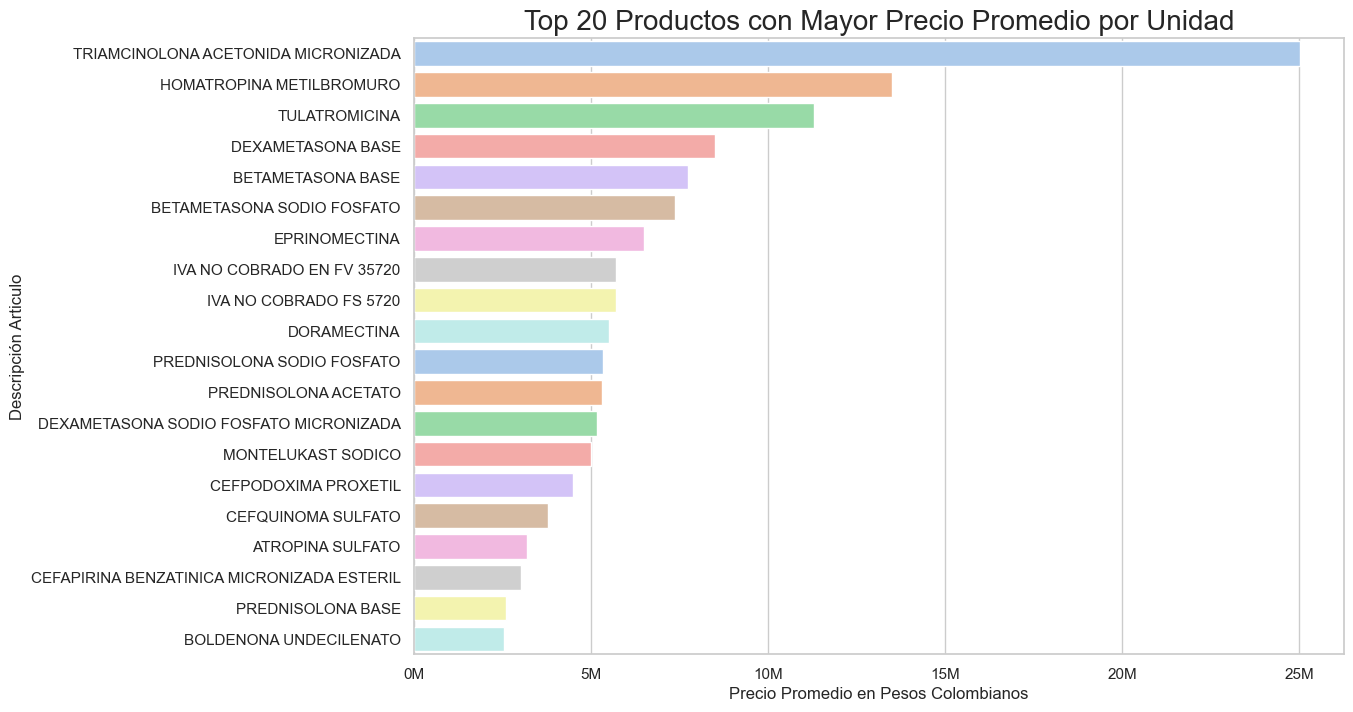

In [34]:
from matplotlib.ticker import FuncFormatter

# Función para formatear los números como "1M", "2M", etc.
def millones_formatter(x, pos):
    return f"{int(x / 1e6)}M"
# Calcular el precio promedio por producto
precio_promedio_por_producto = data.groupby('descripcion_articulo')['precio_unitario'].mean().reset_index()
precio_promedio_por_producto = precio_promedio_por_producto.sort_values(by='precio_unitario', ascending=False)

# Obtener los 20 productos con el precio promedio más alto
top_20_productos = precio_promedio_por_producto.head(20)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras con colores suaves
palette = sns.color_palette("pastel")
sns.barplot(x="precio_unitario", y="descripcion_articulo", data=top_20_productos, palette=palette)

# Configurar el formato del eje y para mostrar los precios en millones
formatter = FuncFormatter(millones_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

# Configurar el título y las etiquetas
plt.xlabel("Precio Promedio en Pesos Colombianos")
plt.ylabel("Descripción Articulo")
plt.title("Top 20 Productos con Mayor Precio Promedio por Unidad",fontsize=20)

# Mostrar el gráfico


Los medicamentos más costosos son la Triamcinolona y la Homatropina ya que son fármacos ampliamente utilizados para aliviar el dolor y realizar diferentes tipos de pruebas oculares lo cual sugiere que son medicamentos exclusivos y por ende su valor es mayor.

# Comportamiento del precio vs la cantidad (Top 20 más vendidos)

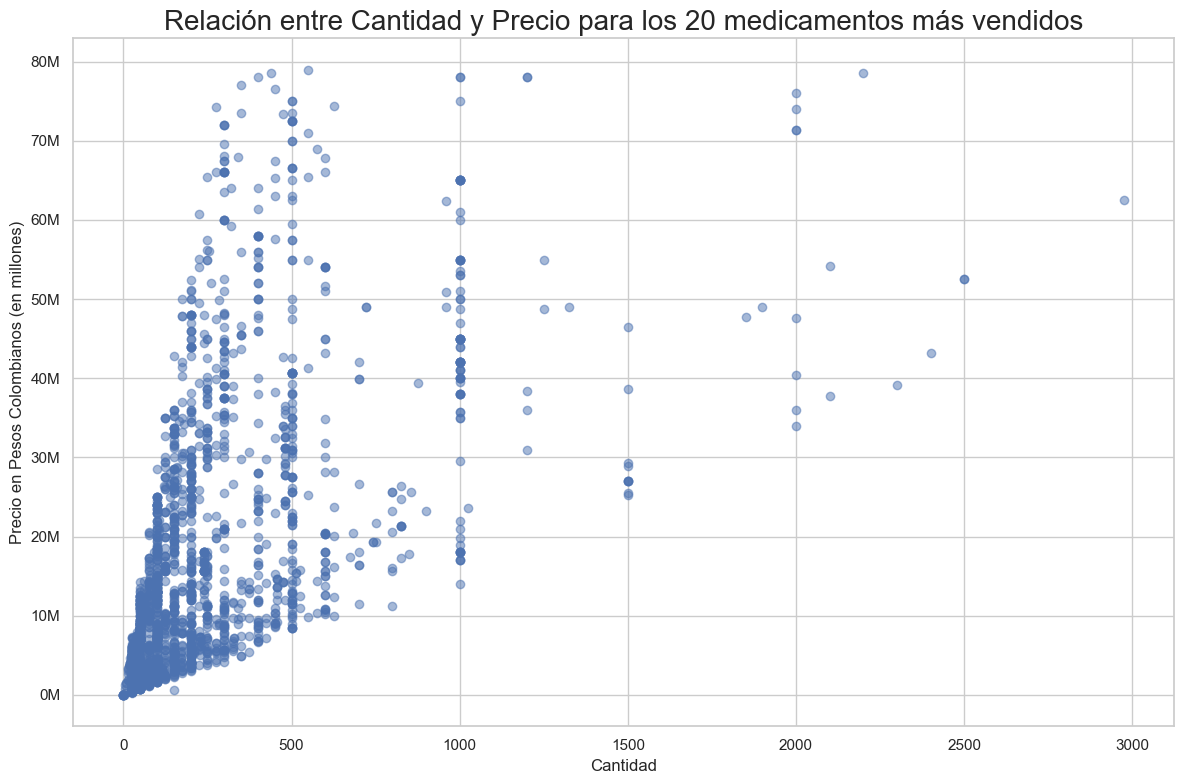

In [35]:

# Calcular las cantidades totales vendidas por cada medicamento
cantidades_por_producto = data.groupby('descripcion_articulo')['cantidad'].sum()

# Seleccionar los 20 medicamentos más vendidos
top_20_medicamentos = cantidades_por_producto.sort_values(ascending=False).head(20)

# Filtrar el DataFrame original solo para estos 20 medicamentos
data_top_20 = data[data['descripcion_articulo'].isin(top_20_medicamentos.index)]

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
plt.scatter(data_top_20['cantidad'], data_top_20['precio_final'], alpha=0.5)

# Configurar el formato del eje y para mostrar los precios en millones
formatter = FuncFormatter(millones_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Configurar el título y las etiquetas
plt.title('Relación entre Cantidad y Precio para los 20 medicamentos más vendidos',fontsize=20)
plt.xlabel('Cantidad')
plt.ylabel('Precio en Pesos Colombianos (en millones)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()




Podemos observar que hay algunos medicamentos bastante costosos ya que para cantidades de 500 unidades el precio final es de alrededor de 70 millones de pesos, mientras que existen algunos de estos que no superan los 10 millones de pesos para cantidades inferiores a 500 unidades comercializadas.

**Toda está información en pesos colombianos**

# Tipo de Presentación de los Medicamentos

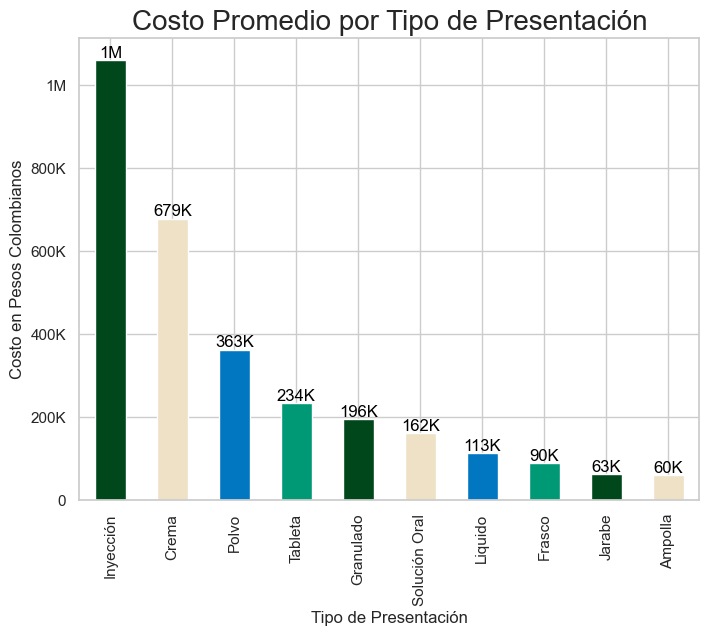

In [36]:
# Group the data by the room type
presentaciones_medicas = data.groupby('presentacion_medica')

# Find out the mean value of the prices in each room type
prices = presentaciones_medicas['precio_unitario'].mean().sort_values(ascending=False)

# Create the bar plot
ax = prices.plot(kind='bar', color=['#00471b', '#eee1c6', '#0077c0', '#009975'], figsize=(8, 6))

# Function to format labels as K (thousands) or M (millions)
def format_label(value, pos):
    if value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

# Add formatted data labels above each bar
for p in ax.patches:
    ax.annotate(format_label(p.get_height(), None),
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Costo Promedio por Tipo de Presentación', fontsize=20)
plt.xlabel('Tipo de Presentación')
plt.ylabel('Costo en Pesos Colombianos')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(format_label))  # Format y-axis labels
plt.show()

Las inyecciones son los medicamentos con el precio medio más alto, seguido de las cremas, lo que sugiere que son medicamentos realmente costosos por las aplicaciones propias que tienen, mientras que los jarabes y las ampollas son los medicamentos más económicos no superando en promedio los 70 k pesos colombianos.

# Tipo de Administración de los Medicamentos

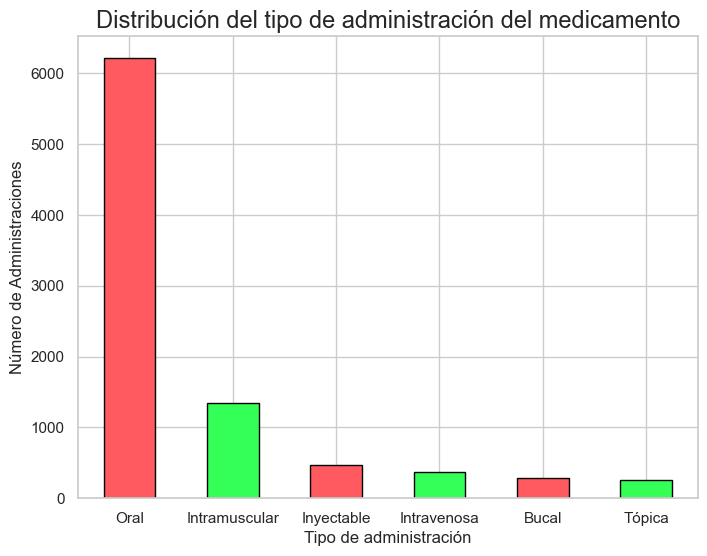

In [37]:

# Contar la frecuencia de cada categoría en 'via_administración'
via_administracion_counts = data['via_administracion'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
via_administracion_counts.plot(kind='bar', color=['#ff5a60', '#33ff57'], edgecolor='black')

# Configurar etiquetas y título
plt.title('Distribución del tipo de administración del medicamento',fontsize=17)
plt.xlabel('Tipo de administración')
plt.ylabel('Número de Administraciones')

# Mostrar el gráfico
plt.xticks(rotation=0)  # Para mostrar las etiquetas en el eje x sin rotación
plt.show()

La mayor parte de los medicamentos se administran oralmente, ya que son los más usados en la comercialización de esta empresa, seguido de los que se administran intramuscularmente, que pueden ser las inyecciones los cuales son los medicamentos más costosos en promedio. 

# Aplicación de impuestos adicionales

In [38]:
#Agregamos una columna adicional a nuestro dataframe en el cual podamos verificar si la venta tuvo impuesto adicional o no
data['venta_impuesto'] = data['Impuesto_total'].apply(lambda x: 'Si' if x > 0 else 'No')

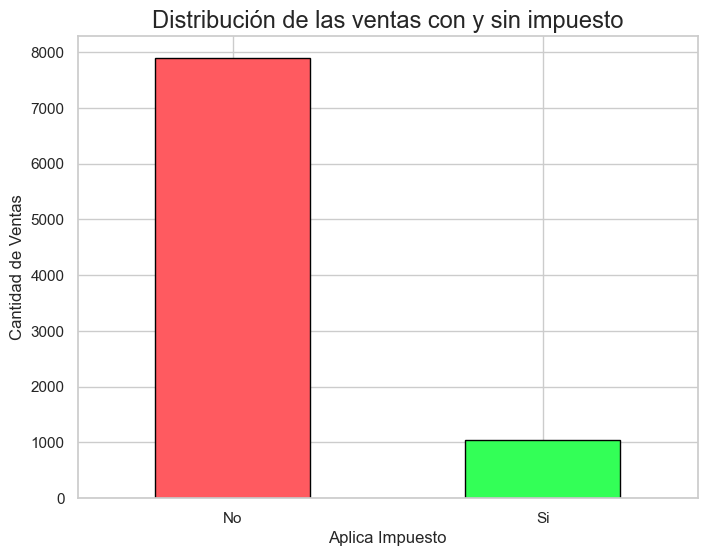

In [39]:
# Contar la frecuencia de cada categoría en 'host_is_superhost' después de la eliminación
impuesto_counts = data['venta_impuesto'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
impuesto_counts.plot(kind='bar', color=['#ff5a60', '#33ff57'], edgecolor='black')

# Configurar etiquetas y título
plt.title('Distribución de las ventas con y sin impuesto',fontsize=17)
plt.xlabel('Aplica Impuesto')
plt.ylabel('Cantidad de Ventas')

# Mostrar el gráfico
plt.xticks(rotation=0)  # Para mostrar las etiquetas en el eje x sin rotación
plt.show()

La mayor cantidad de las ventas realizadas en estos tres años no se les ha aplicado ningún impuesto adicional, más del 70% de estas transacciones ya tenían el impuesto inmerso en el precio, sin embargo, hay otras en las cuales si existe un impuesto adicional.

# Evolución de las Ventas y los precios Mensualmente 

In [40]:
#Creamos columnas especificas para año, mes y año_mes
data['anio'] = data['fecha_contabilización'].dt.year
data['mes'] = data['fecha_contabilización'].dt.month
data['anio_mes'] = data['fecha_contabilización'].dt.strftime('%Y-%m')

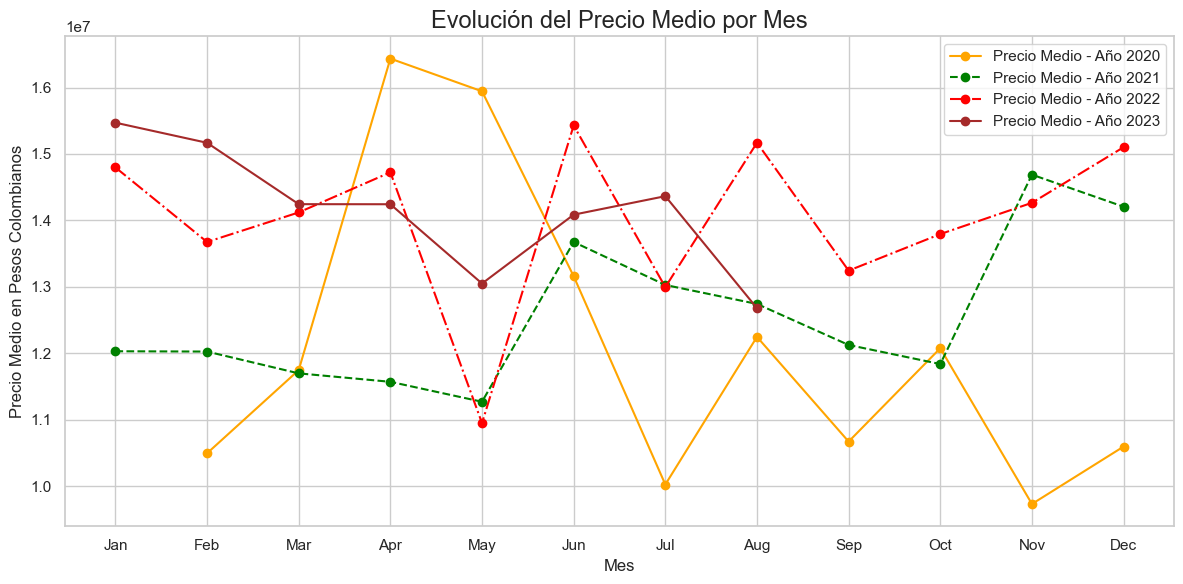

In [41]:
import calendar
# Calcular el precio medio por mes para cada año
precio_medio_por_mes = data.groupby(['anio', 'mes'])['precio_final'].mean().unstack()

# Crear el gráfico de líneas para cada año
plt.figure(figsize=(12, 6))

# Configurar colores y estilos
colores = ['Orange', 'green', 'red','brown']
estilos = ['-', '--', '-.']

# Ciclo para representar cada año
for i, anio in enumerate(precio_medio_por_mes.index):
    # Obtener el estilo y color adecuado
    estilo = estilos[i % len(estilos)]
    color = colores[i % len(colores)]
    
    meses_con_datos = ~precio_medio_por_mes.loc[anio].isnull()  # Máscara para meses con datos
    plt.plot(precio_medio_por_mes.loc[anio][meses_con_datos], 
             label=f'Precio Medio - Año {anio}', 
             color=color, linestyle=estilo, marker='o')

# Configurar título y etiquetas
plt.title('Evolución del Precio Medio por Mes',fontsize=17)
plt.xlabel('Mes')
plt.ylabel('Precio Medio en Pesos Colombianos')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Usar abreviaturas de mes

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2020 fue uno de los años en los cuales el precio medio tuvo una mayor variación, teniendo en noviembre el menor precio medio en la muestra, mientras que en abril del mismo año se comercializaron los productos con el precio medio más costoso de la muestra. Por su parte 2023, ha experimentado precios medios similares en lo corrido del año terminando con un precio medio ofrecido de alrededor de 1.5 M.

**Todos los precios en Pesos colombianos**

# Evolución de las Cantidades Vendidas a Nivel Mensual

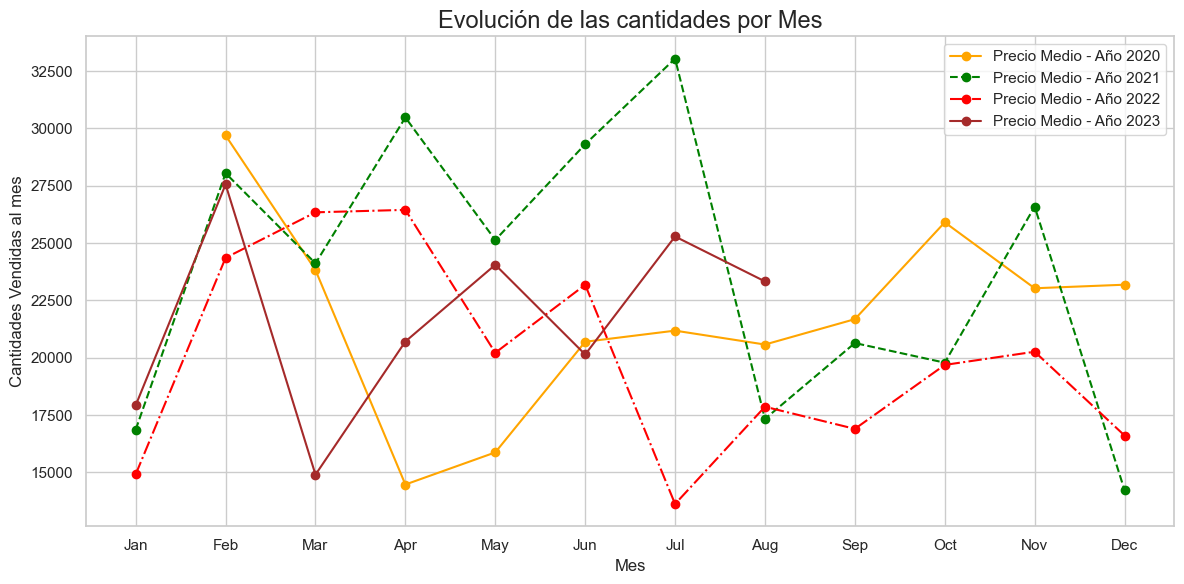

In [42]:
# Calcular el precio medio por mes para cada año
cantidad_por_mes = data.groupby(['anio', 'mes'])['cantidad'].sum().unstack()

# Crear el gráfico de líneas para cada año
plt.figure(figsize=(12, 6))

# Configurar colores y estilos
colores = ['Orange', 'green', 'red','brown']
estilos = ['-', '--', '-.']

# Ciclo para representar cada año
for i, anio in enumerate(cantidad_por_mes.index):
    # Obtener el estilo y color adecuado
    estilo = estilos[i % len(estilos)]
    color = colores[i % len(colores)]
    
    meses_con_datos = ~cantidad_por_mes.loc[anio].isnull()  # Máscara para meses con datos
    plt.plot(cantidad_por_mes.loc[anio][meses_con_datos], 
             label=f'Precio Medio - Año {anio}', 
             color=color, linestyle=estilo, marker='o')

# Configurar título y etiquetas
plt.title('Evolución de las cantidades por Mes',fontsize=17)
plt.xlabel('Mes')
plt.ylabel('Cantidades Vendidas al mes')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Usar abreviaturas de mes

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

El mes en el cual se vendió la menor cantidad de materias primas de medicamentos y/o medicamentos fue el mes de abril de 2020 en el cual se vendieron menos de 10.000 unidades, no obstante, el precio medio de estas unidades fue el más alto, ubicándose en alrededor de 1.7M de pesos colombianos

# Laboratorios o Proveedores a los cuales más cantidades se les vende

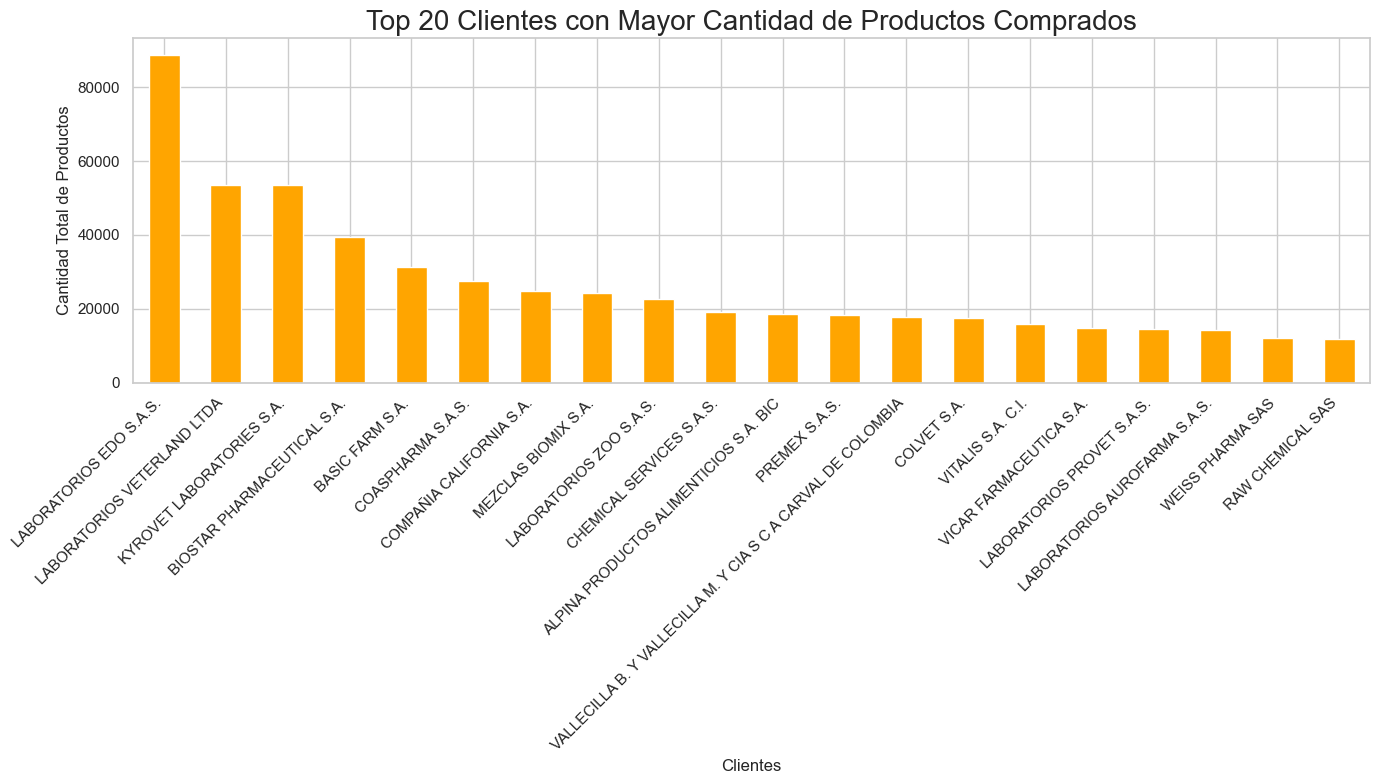

In [43]:
# Calcular las cantidades totales vendidas por cada cliente
cantidades_por_cliente = data.groupby('nombre_cliente')['cantidad'].sum()

# Seleccionar los 20 clientes con mayores cantidades compradas
top_20_clientes = cantidades_por_cliente.sort_values(ascending=False).head(20)

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))  # Ajustamos el tamaño de la figura

# Creamos el gráfico de barras y rotamos las etiquetas del eje x
ax = top_20_clientes.plot(kind='bar', color='orange')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Configurar el título y las etiquetas
plt.title('Top 20 Clientes con Mayor Cantidad de Productos Comprados', fontsize=20)
plt.xlabel('Clientes')
plt.ylabel('Cantidad Total de Productos')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Los laboratorios a los cuales se les ha disponibilizado una mayor cantidad de productos son Laboratorios EDO S.A.S seguido de los laboratorios Veterland los cuales han demandado alrededor de 85 mil y 50 mil unidades a lo largo de los tres años, siendo una fuente principal de ingresos para Comercial Química.

# Apartado Numero 2 (Ventas Totalizadas)
<h2>Loading data</h2>
<h3>Cargamos los dataset Necesarios</h3>

In [44]:
#Este es el dataset que sube el auxiliar cada periodo de tiempo, segun la hoja de datos ventas del primer apartado
datos = pd.read_excel("Archivos/COMPRAS 2023 Dashboard.xlsm", sheet_name="DATOS VENTAS")

In [45]:
datos

AÑO         MES FECHA DE CONTABILIZACIÓN  \
0     2020  SEPTIEMBRE               2020-09-25   
1     2020       ENERO               2020-01-31   
2     2020       JUNIO               2020-06-12   
3     2020       JUNIO               2020-06-12   
4     2022       MARZO               2022-03-01   
...    ...         ...                      ...   
9872  2023        MAYO               2023-05-02   
9873  2023       MARZO               2023-03-21   
9874  2023       MARZO               2023-03-21   
9875  2023       MARZO               2023-03-21   
9876  2023        MAYO               2023-05-08   

                      DESCRIPCIÓN DEL ARTICULO  \
0                           CIPROFLOXACINA HCL   
1                    SALDOS INICIAL 01-31-2020   
2              OXITETRACICLINA BASE INYECTABLE   
3                              DIPIRONA SODICA   
4     VITAMINA E ALFA TOCOFEROL ACETATO (BASF)   
...                                        ...   
9872                       CONDROITINA SULFATO   
9873                    BOLDENONA UNDECILENATO   
9874                              NICOTINAMIDA   
9875                              RICOBENDAZOL   
9876                      CIPERMETRINA TECNICA   

                   NOMBRE DEL CLIENTE  CANTIDAD  Unnamed: 6  \
0     DUARTE RODRIGUEZ WILLIAM MOISES     150.0         NaN   
1                          PRODIA SAS       0.0         NaN   
2                   COASPHARMA S.A.S.     200.0         NaN   
3                   COASPHARMA S.A.S.      75.0         NaN   
4         BELL CHEM INTERNACIONAL SAS      25.0         NaN   
...                               ...       ...         ...   
9872             QUIMICA PATRIC LTDA.     100.0         NaN   
9873          LABORATORIOS EDO S.A.S.      25.0         NaN   
9874          LABORATORIOS EDO S.A.S.     250.0         NaN   
9875          LABORATORIOS EDO S.A.S.     140.0         NaN   
9876    LABORATORIOS AUROFARMA S.A.S.     720.0         NaN   

                     NOMBRE DEL CLIENTE.1                           Unnamed: 8  
0           LABORATORIOS AUROFARMA S.A.S.        LABORATORIOS AUROFARMA S.A.S.  
1     PRODUCTOS MEDICOS VETERINARIOS S.A.  PRODUCTOS MEDICOS VETERINARIOS S.A.  
2                   LABORATORIOS MV LTDA.                LABORATORIOS MV LTDA.  
3             BIOSTAR PHARMACEUTICAL S.A.          BIOSTAR PHARMACEUTICAL S.A.  
4       AGV SALUD ANIMAL AGROINSUVET S.A.    AGV SALUD ANIMAL AGROINSUVET S.A.  
...                                   ...                                  ...  
9872                                  NaN                                  NaN  
9873                                  NaN                                  NaN  
9874                                  NaN                                  NaN  
9875                                  NaN                                  NaN  
9876                                  NaN                                  NaN  

[9877 rows x 9 columns]

In [46]:
#Se elimina las columnas 7,8,9 ya que son datos basura en la hoja,ya que solo sirven para fines de verificación del auxiliar (pero no se pueden eliminar en dicho archivo)
datos=datos.drop(['Unnamed: 6',"NOMBRE DEL CLIENTE.1","Unnamed: 8"], axis=1)

In [47]:
datos

AÑO         MES FECHA DE CONTABILIZACIÓN  \
0     2020  SEPTIEMBRE               2020-09-25   
1     2020       ENERO               2020-01-31   
2     2020       JUNIO               2020-06-12   
3     2020       JUNIO               2020-06-12   
4     2022       MARZO               2022-03-01   
...    ...         ...                      ...   
9872  2023        MAYO               2023-05-02   
9873  2023       MARZO               2023-03-21   
9874  2023       MARZO               2023-03-21   
9875  2023       MARZO               2023-03-21   
9876  2023        MAYO               2023-05-08   

                      DESCRIPCIÓN DEL ARTICULO  \
0                           CIPROFLOXACINA HCL   
1                    SALDOS INICIAL 01-31-2020   
2              OXITETRACICLINA BASE INYECTABLE   
3                              DIPIRONA SODICA   
4     VITAMINA E ALFA TOCOFEROL ACETATO (BASF)   
...                                        ...   
9872                       CONDROITINA SULFATO   
9873                    BOLDENONA UNDECILENATO   
9874                              NICOTINAMIDA   
9875                              RICOBENDAZOL   
9876                      CIPERMETRINA TECNICA   

                   NOMBRE DEL CLIENTE  CANTIDAD  
0     DUARTE RODRIGUEZ WILLIAM MOISES     150.0  
1                          PRODIA SAS       0.0  
2                   COASPHARMA S.A.S.     200.0  
3                   COASPHARMA S.A.S.      75.0  
4         BELL CHEM INTERNACIONAL SAS      25.0  
...                               ...       ...  
9872             QUIMICA PATRIC LTDA.     100.0  
9873          LABORATORIOS EDO S.A.S.      25.0  
9874          LABORATORIOS EDO S.A.S.     250.0  
9875          LABORATORIOS EDO S.A.S.     140.0  
9876    LABORATORIOS AUROFARMA S.A.S.     720.0  

[9877 rows x 6 columns]

In [48]:
datos.dtypes

AÑO                                  int64
MES                                 object
FECHA DE CONTABILIZACIÓN    datetime64[ns]
DESCRIPCIÓN DEL ARTICULO            object
NOMBRE DEL CLIENTE                  object
CANTIDAD                           float64
dtype: object

In [49]:
# sort the columns by the one with the most null values to the one with the least 
percentage_result = datos.isnull().sum()/datos.shape[0] * 100
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "NullsPercentage": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result= percentage_result.sort_values(by='NullsPercentage', ascending=False)
percentage_result

columns  NullsPercentage
0                       AÑO              0.0
1                       MES              0.0
2  FECHA DE CONTABILIZACIÓN              0.0
3  DESCRIPCIÓN DEL ARTICULO              0.0
4        NOMBRE DEL CLIENTE              0.0
5                  CANTIDAD              0.0

Como se puede observar este Dataframe no tiene valores incompletos en nignuna de sus variables, esto se debea que el auxiliar crea esta hoja.

In [50]:
materialNumero=datos["DESCRIPCIÓN DEL ARTICULO"].unique()
print("Numero de medicamentos:",len(materialNumero))

Numero de medicamentos: 235


In [51]:
datos["DESCRIPCIÓN DEL ARTICULO"].value_counts( normalize=True) 

SALDOS INICIAL 01-31-2020                 0.090210
NICOTINAMIDA                              0.031892
VITAMINA C - ACIDO ASCORBICO CRISTALES    0.025716
IVERMECTINA                               0.023995
CAFEINA ANHIDRA                           0.023691
                                            ...   
FC 2167 ESTIBAS PLASTICAS 50 UNID         0.000101
BODEGA 76                                 0.000101
TERRENO BG 76                             0.000101
ACESULFAME K                              0.000101
L-ISOLEUCINA x 5KG                        0.000101
Name: DESCRIPCIÓN DEL ARTICULO, Length: 235, dtype: float64

Se observa que existe un dato llamado SALDOS INICIAL 01-31-2020 , esto no es un producto son ajustes al inventario y todos sus cantidades estan en 0, por esto se elimina para tener solo los productos.

In [52]:
datos.shape

(9877, 6)

In [53]:
datos = datos[~datos['DESCRIPCIÓN DEL ARTICULO'].str.contains('SALDOS INICIAL')]

In [54]:
datos.shape

(8986, 6)

<p style='color:#C42212'>Se eliminan estos registros que eran 891</p>

In [55]:
datos["DESCRIPCIÓN DEL ARTICULO"].value_counts( normalize=True) #calculate the absolute frequency

NICOTINAMIDA                              0.035055
VITAMINA C - ACIDO ASCORBICO CRISTALES    0.028266
IVERMECTINA                               0.026374
CAFEINA ANHIDRA                           0.026041
ANTIPIRINA                                0.023592
                                            ...   
TERRENO BG 76                             0.000111
ACESULFAME K                              0.000111
HOMATROPINA METILBROMURO                  0.000111
MONOETANOLAMINA                           0.000111
L-ISOLEUCINA x 5KG                        0.000111
Name: DESCRIPCIÓN DEL ARTICULO, Length: 234, dtype: float64

In [56]:
datos["CANTIDAD"].describe()

count    8986.000000
mean      116.554904
std       229.895664
min         0.000000
25%        25.000000
50%        50.000000
75%       100.000000
max      5000.000000
Name: CANTIDAD, dtype: float64

In [57]:
q1 = datos["CANTIDAD"].quantile(0.25)
q3 = datos["CANTIDAD"].quantile(0.75)
iqr = q3 - q1

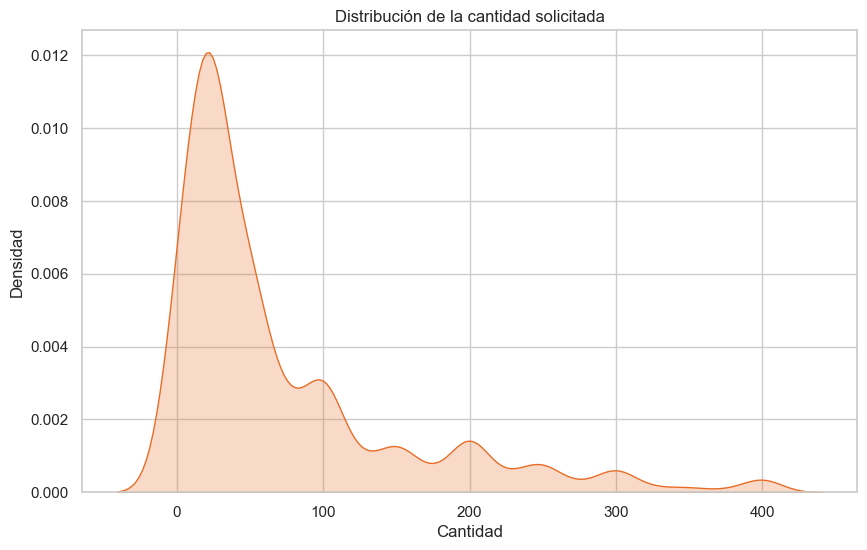

In [58]:
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))  
sns.kdeplot(data=datos.loc[datos["CANTIDAD"] <= (q3 + 4 * iqr)]["CANTIDAD"], fill=True, color='#E86D26')  
plt.xlabel('Cantidad')  
plt.ylabel('Densidad') 
plt.title('Distribución de la cantidad solicitada')  
plt.show()

<p>Se observa que la cantidad que se compra por lo general es mejor a 100 en la mayoría de pedidos, aun así existen valores en cantidades exactas como 200,300; se usa  el rango x4 para poder observar esas solicitudes mayores a 100 y 200</p>

In [59]:
#funcion que mide la cantidad de solictudes de un medicamento por año, según la lista de los medicamentos mas solictados puede evidenciar
def getSeriesByMaterial(material, anio):
    filterDf_grapich = datos[(datos['AÑO'] == anio) & (datos["DESCRIPCIÓN DEL ARTICULO"] == material)].sort_values(by='FECHA DE CONTABILIZACIÓN')
    filterDf_grapich['FECHA DE CONTABILIZACIÓN'] = pd.to_datetime(filterDf_grapich['FECHA DE CONTABILIZACIÓN'])
    filterDf_grapich = filterDf_grapich.resample('M', on='FECHA DE CONTABILIZACIÓN').sum()

    fechas = filterDf_grapich.index  
    cantidades = filterDf_grapich['CANTIDAD']

    nombres_meses = fechas.strftime('%B')

    plt.figure(figsize=(10, 6))
    plt.bar(nombres_meses, cantidades)  

    plt.xlabel('Mes')
    plt.ylabel('Cantidad')
    plt.title('Total de Cantidades por Mes para '+material+ " en el año: "+ str(anio) )

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<p> Los medicamentos mas vendidos son: </p>

<ul>
<li>VITAMINA C - ACIDO ASCORBICO CRISTALES</li>
<li>NICOTIMIDA</li>
<li>CIPERMETRINA TECNICA</li>
<li>CAFEINA ANHIDRA</li>
<li>ANTIPIRINA</li>
<li>AMITRAZ TECNICO</li>
<li>ACIDO ACETIL SALISILICO</li>
<li>GLUCONATO DE CALCIO</li>
<li>ALBENDAZOL MICRONIZADO</li>
<li>CIPROFLOXACINA HCL</li>
<li>OXITETRACICLINA HCL</li>
<li>ETHION TECNICO (PI INDUSTRIES)</li>
</ul>
<p>Según lo establecido en los estudios realziados en los 3 analisis a los productos</p>
<p style='color:Brown'> Puede usar cualquiera de los medicamentos anteriores en la funcion <strong>getSeriesByMaterial(Medicamento,año)</strong></p>

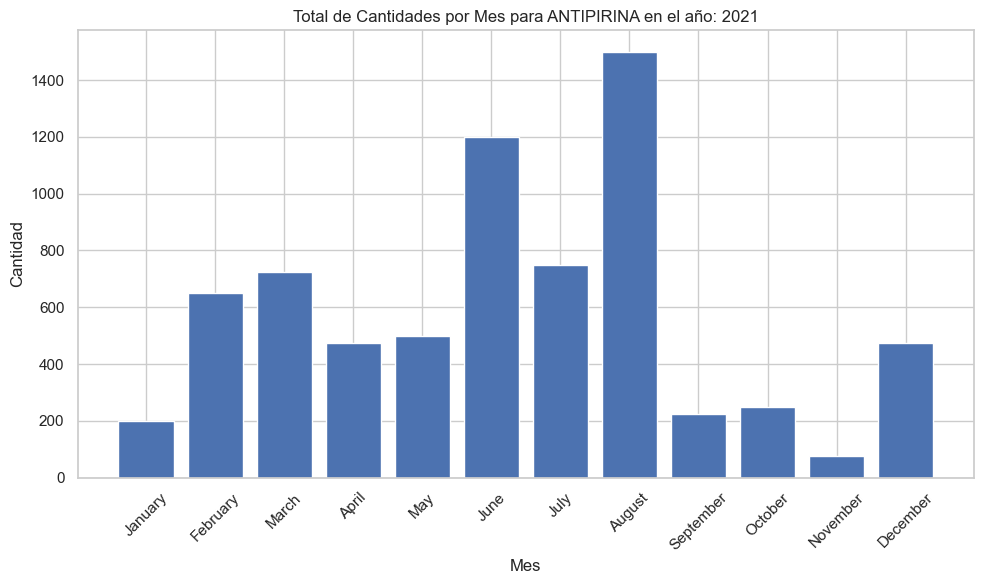

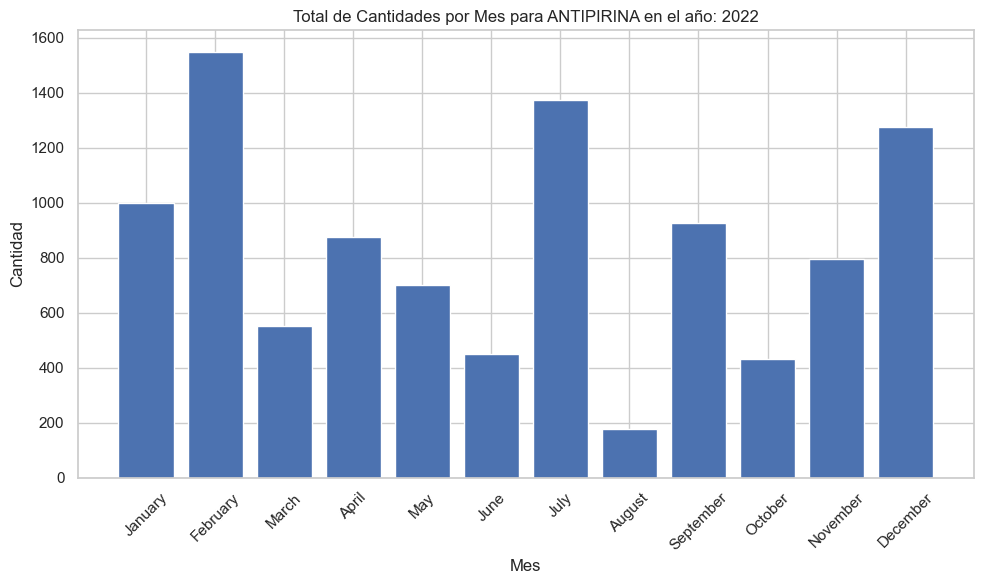

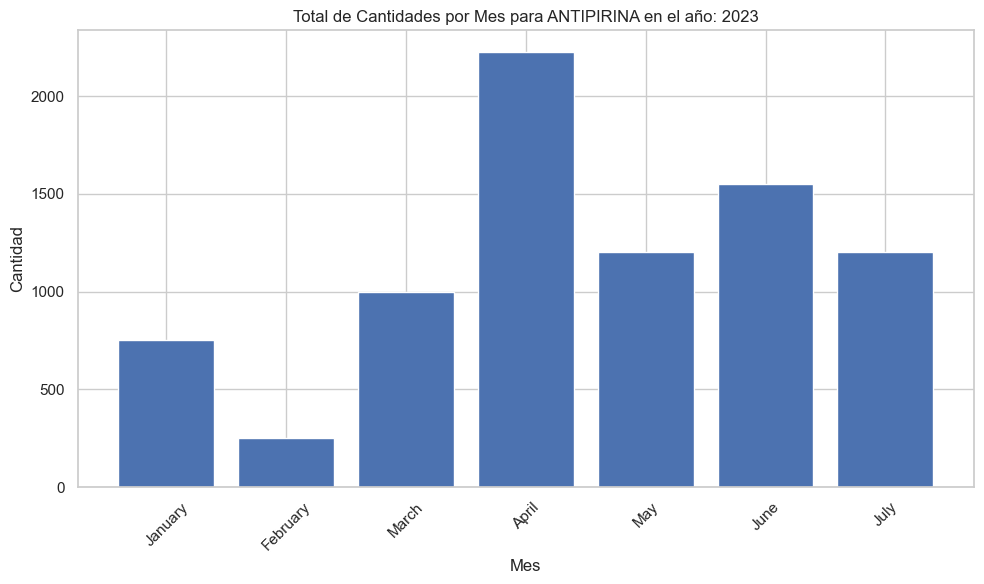

In [60]:
getSeriesByMaterial("ANTIPIRINA",2021)
getSeriesByMaterial("ANTIPIRINA",2022)
getSeriesByMaterial("ANTIPIRINA",2023)

Con estas graficas se puede determinar cuales son las mejores fechas para vendar determinado medicamento.

In [61]:
materialImportante = datos["DESCRIPCIÓN DEL ARTICULO"].value_counts(normalize=True).cumsum()

In [62]:
MedicamentosImportantes = materialImportante.loc[materialImportante < 0.4].index.tolist()
MedicamentosImportantes

['NICOTINAMIDA',
 'VITAMINA C - ACIDO ASCORBICO CRISTALES',
 'IVERMECTINA',
 'CAFEINA ANHIDRA',
 'ANTIPIRINA',
 'PENICILINA PROCAINICA ESTERIL',
 'OXITETRACICLINA HCL',
 'CIPROFLOXACINA HCL',
 'STREPTOMICINA SULFATO ESTERIL',
 'OXITETRACICLINA BASE INYECTABLE',
 'VITAMINA B2 5 FOSFATO (RIBOFLAVINA)',
 'VITAMINA B1 HCL (TIAMINA HCL)',
 'DIMINACENE DIACETURATO',
 'FENBENDAZOL MICRONIZADO (ALIVIRA)',
 'ALBENDAZOL MICRONIZADO',
 'ACIDO ACETIL SALICILICO',
 'SULFADIAZINA SODICA',
 'FENBENDAZOL MICRONIZADO',
 'VITAMINA E ALFA TOCOFEROL ACETATO']

Finalmente se realiza un analisis de pareto para poder encontrar los medicamentos mas solicitados eb la compañia en cada año desde el 2020, teniendo la conclusion mencionada anteriormente

In [63]:
def graphPareto (material,anio):
    plt.figure(figsize=(15, 2))
    material[:15].plot(kind="bar", color="steelblue") 
    plt.title("Análisis de Pareto Comercial Química para el año:"+ str(anio), fontsize=20) 
    plt.grid(axis="y")
    plt.tick_params(axis='both', which='both', labelsize=8)
    plt.show()

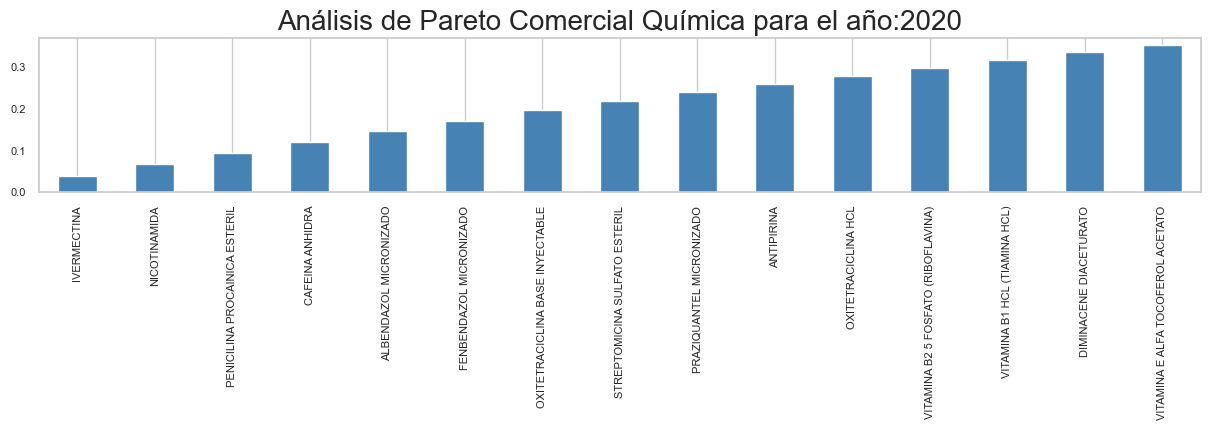

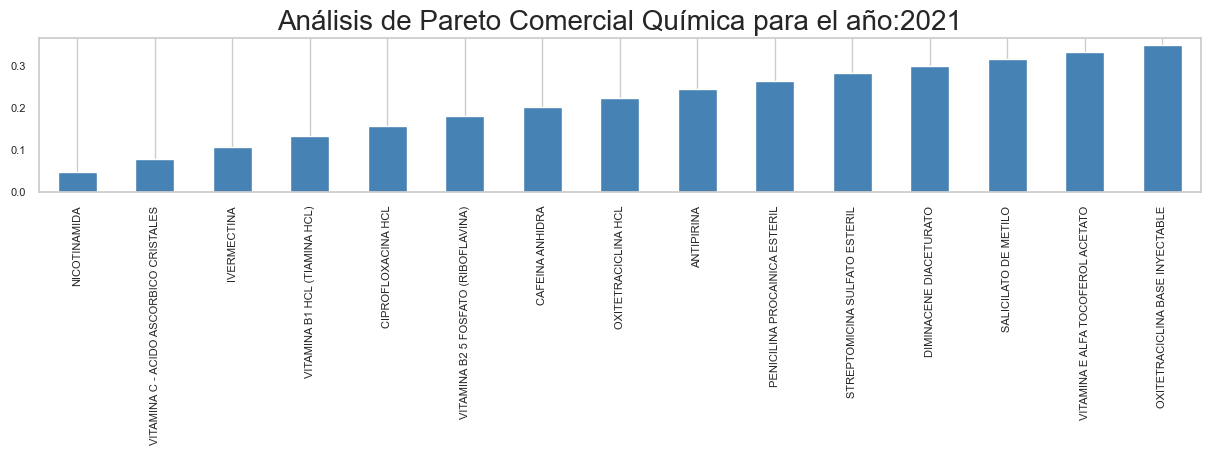

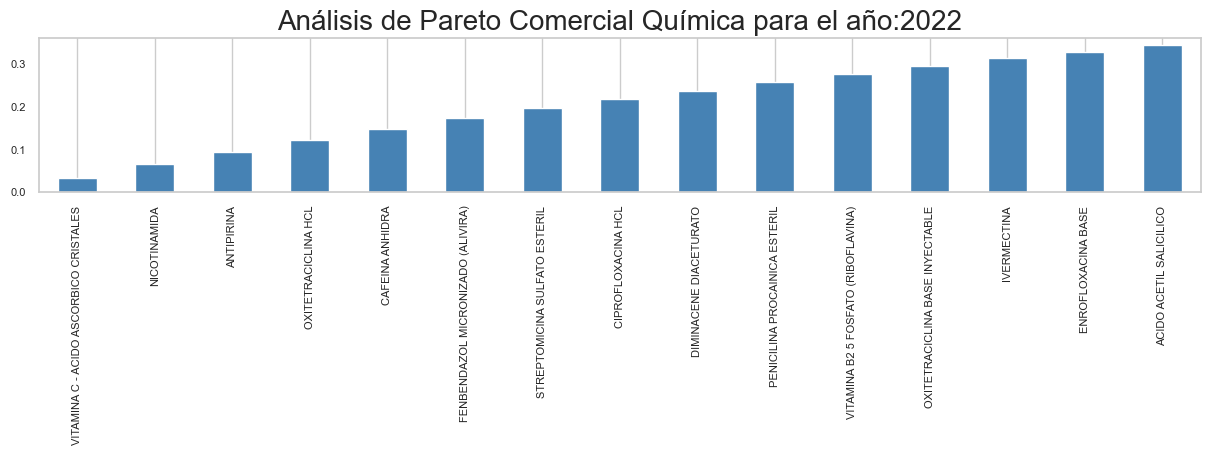

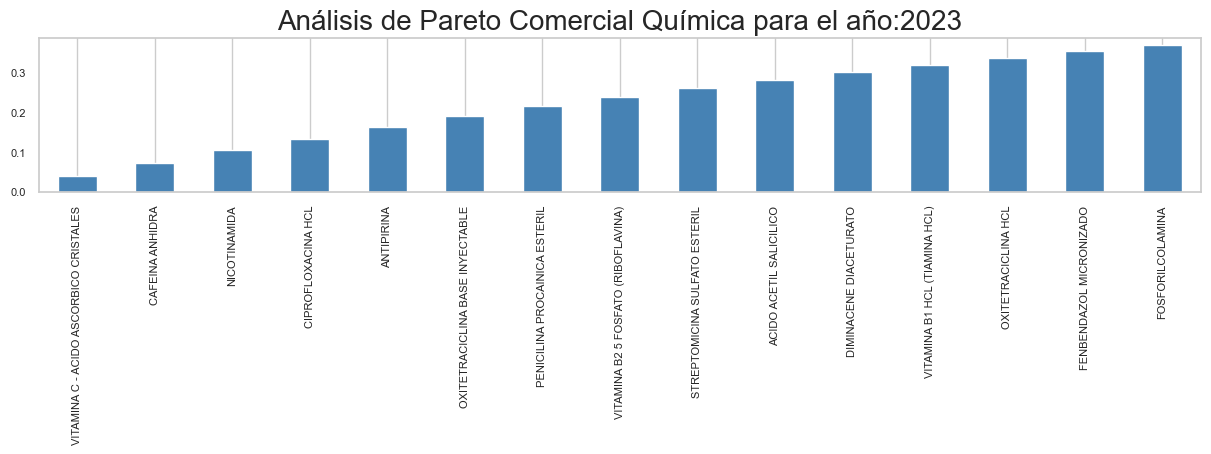

In [64]:
anios = datos["AÑO"].unique().tolist()
anios.sort(reverse=False)
for anio in anios:
    materialPorAnio = datos[(datos['AÑO'] == anio)]["DESCRIPCIÓN DEL ARTICULO"].value_counts(normalize=True).cumsum()
    graphPareto(materialPorAnio,anio)


# Apartado Numero 3 (Operaciones Anuales)
<h2>Loading data</h2>
<h3>Cargamos los dataset Necesarios</h3>

In [65]:
# Cargamos el dataframe
Operación_df = pd.read_csv("Archivos/Dataset_Operacion_Anual.csv")

In [66]:
# Mostramos las dimensiones del dataframe
Operación_df.shape

(30100, 5)

In [67]:
# Showing column types
Operación_df.dtypes

DESCRIPCIÓN DEL ARTICULO    object
CANTIDAD                     int64
MES                         object
TIPO                        object
AÑO                          int64
dtype: object

In [68]:
Operación_df.sample(10)

DESCRIPCIÓN DEL ARTICULO  CANTIDAD         MES        TIPO  \
11686                        FLORFENICOL         0   NOVIEMBRE     COMPRAS   
18553                  ERITROMICINA BASE         0       JULIO     COMPRAS   
2521           PENICILINA SODICA ESTERIL         0   DICIEMBRE      VENTAS   
1780                 DOXICICLINA HICLATO         0  SEPTIEMBRE      VENTAS   
26128                  L-GLUTAMINA x 2KG         0       JUNIO     COMPRAS   
20448             BUTOXIDO DE PIPERONILO       400       ABRIL  INVENTARIO   
4357                     DIPIRONA SODICA    -27050       ENERO  INVENTARIO   
8823   AMOXICILINA TRIHIDRATO COMPACTADA         0     OCTUBRE      VENTAS   
7998                         CLOTRIMAZOL         0       JUNIO      VENTAS   
23361                       NITAZOXANIDA         0        MAYO      VENTAS   

        AÑO  
11686  2022  
18553  2021  
2521   2023  
1780   2023  
26128  2020  
20448  2021  
4357   2023  
8823   2022  
7998   2022  
23361  2020

## 1. Verificamos la calidad de los datos

In [69]:
# Listado de los meses 
month_list = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']

In [70]:
# Verificamos que los meses correspondan a la lista de meses especificados 
Operación_df.loc[~Operación_df["MES"].isin(month_list), "MES"].unique()

array([], dtype=object)

In [71]:
# Finding the number of values for the variable
Operación_df["MES"].nunique()

12

## Detectamos columnas duplicadas

In [72]:
# Revisamos la información de los duplicados por producto.
duplicates_by_product = Operación_df.loc[Operación_df["DESCRIPCIÓN DEL ARTICULO"].duplicated(keep=False)]
duplicates_by_product.shape

(30098, 5)

In [73]:
# Elegimos unas columnas específicas para validar la información de los duplicados
duplicados = Operación_df[Operación_df.duplicated(subset=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], keep=False)]

In [74]:
# Eliminamos los duplicados de este dataframe
Operación_df = Operación_df.drop_duplicates(subset=['TIPO', 'AÑO', 'MES', 'DESCRIPCIÓN DEL ARTICULO', 'CANTIDAD'], keep='first')

In [75]:
Operación_df.shape

(29680, 5)

Después de realizar la eliminación de duplicados nos quedan 29680 filas de acuerdo a los parámetros establecidos

# 2. Análisis Univariado

**Descripción del Artículo**

In [76]:
#Cantidad de artículos 
Operación_df["DESCRIPCIÓN DEL ARTICULO"].nunique()

224

In [77]:
# Mostramos la cantidad de artículos únicos
Operación_df["DESCRIPCIÓN DEL ARTICULO"].unique()

array(['ACETAMINOFEN (PARACETAMOL)', 'ACIDO ACETIL SALICILICO',
       'ACIDO FOLICO', 'ACIDO SALICILICO',
       'ADENOSIN TRIFOSFATO DISODICO (ATP)', 'ALBENDAZOL MICRONIZADO',
       'ALGINATO DE SODIO', 'AMITRAZ TECNICO',
       'AMOXICILINA TRIHIDRATO COMPACTADA',
       'AMOXICILINA TRIHIDRATO POLVO', 'AMPICILINA SODICA POLVO ESTERIL',
       'AMPICILINA TRIHIDRATO MICRONIZADA', 'AMPICILINA TRIHIDRATO POLVO',
       'AMPROLIO HCL', 'ANTIPIRINA', 'ATROPINA SULFATO', 'AZITROMICINA',
       'BENZOCAINA', 'BETAMETASONA BASE', 'BETAMETASONA SODIO FOSFATO',
       'BIOTINA 2%', 'BOLDENONA UNDECILENATO', 'BROMHEXINA HCL',
       'BUTOXIDO DE PIPERONILO', 'CACODILATO DE SODIO', 'CAFEINA ANHIDRA',
       'CEFAPIRINA BENZATINICA MICRONIZADA ESTERIL',
       'CEFOPERAZONA SODICA ESTERIL', 'CEFPODOXIMA PROXETIL',
       'CEFQUINOMA SULFATO', 'CEFTIOFUR HCL ESTERIL',
       'CEFTIOFUR LIBRE DE ACIDOS', 'CEFTIOFUR SODICO ESTERIL',
       'CIPERMETRINA TECNICA',
       'CIPERMETRINA TECNICA (EST

In [78]:
# Debido a que saldo inicial no corresponde a ninguno de los medicamentos los excluimos de nuestro dataset
Operación_df = Operación_df[~Operación_df['DESCRIPCIÓN DEL ARTICULO'].str.startswith('SALDOS INICIAL')]

In [79]:
# Calculamos la frecuencia absoluta de los 20 productos que más aparecen en nuestro dataset

articulos = Operación_df["DESCRIPCIÓN DEL ARTICULO"].value_counts().nlargest(20)

# Calcula la frecuencia absoluta para cada uno de los 20 artículos
articulos = Operación_df[Operación_df["DESCRIPCIÓN DEL ARTICULO"].isin(articulos.index)]["DESCRIPCIÓN DEL ARTICULO"].value_counts()

print(articulos)

ACETAMINOFEN (PARACETAMOL)            140
METRONIDAZOL BENZOYL MICRONIZADO      140
PAMOATO DE PIRANTEL x 5KG             140
PAMOATO DE PIRANTEL (IPCA)            140
PAMOATO DE PIRANTEL                   140
PAMOATO DE OXANTEL                    140
OXITETRACICLINA HCL INYECTABLE        140
OXITETRACICLINA HCL                   140
OXITETRACICLINA BASE INYECTABLE       140
OXIBENDAZOL MICRONIZADO               140
NORFLOXACINA BASE                     140
NITAZOXANIDA MICRONIZADA              140
NITAZOXANIDA                          140
NIMESULIDA                            140
NICOTINAMIDA                          140
NEOMICINA SULFATO GRADO INYECTABLE    140
NEOMICINA SULFATO                     140
MONTELUKAST SODICO                    140
MONOETANOLAMINA                       140
PANTOTENATO DE CALCIO                 140
Name: DESCRIPCIÓN DEL ARTICULO, dtype: int64


La frecuencia de los articulos es adecuada debido a que el set de datos mantiene la misma cantidad de articulos por cada operación.

## CANTIDAD

In [80]:
# Calculando la frecuencia relativa de la cantidad para observar cuales son las que más se repiten 
Operación_df["CANTIDAD"].value_counts(dropna=False, normalize=True)

 0        0.605958
 25       0.012187
-1        0.009953
 50       0.009580
 100      0.007380
            ...   
-54075    0.000034
-1790     0.000034
-3990     0.000034
-9575     0.000034
-1070     0.000034
Name: CANTIDAD, Length: 2044, dtype: float64

El valor mas recurrente en el set de datos es el 0, el cual está presente en alrededor del 60% de la muestra, esto debido a que en la mayoria de casos los productos que no tienen transacciones de ventas o compras se les asigna un valor de 0.

In [81]:
# Calculamos las estadísticas descriptivas para la variable de Cantidad
Operación_df["CANTIDAD"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    29540.000000
mean      -576.819194
std       3641.667326
min     -84750.000000
5%       -3000.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%        425.000000
max      12000.000000
Name: CANTIDAD, dtype: float64

Esta información es un mix de valores donde se mezclan tres tipos de operación, compras, ventas y el resultado del inventario, los valores negativos sobre el set de datos son valores que actualmente no son correlacionados con la hoja de materia prima y es por ello que aunque muestran un dato negativo su significado mas preciso es que cuenta con Stock sin embargo no podemos predecir un valor exacto.

In [82]:
# Aplicamos la función del rango intercuartilico con el fin de detectar valores atípicos o extremos en las cantidades
q1 = Operación_df["CANTIDAD"].quantile(0.25)
q3 = Operación_df["CANTIDAD"].quantile(0.75)
iqr = q3 - q1

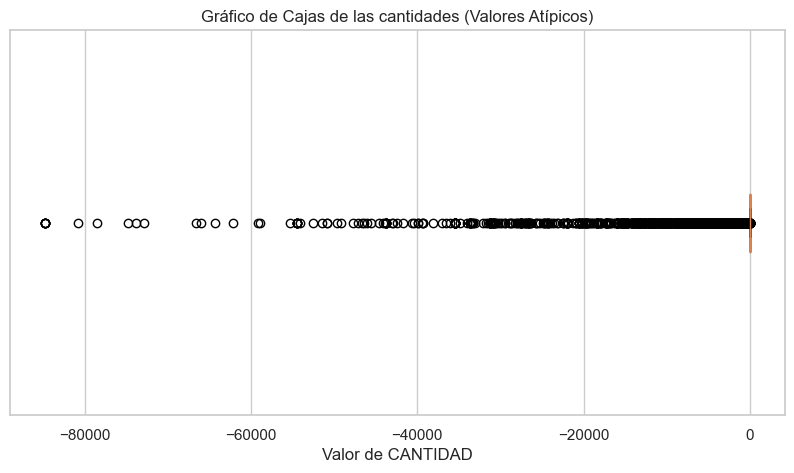

In [83]:
data_filtered = Operación_df.loc[Operación_df["CANTIDAD"] <= (q3 + 1.5 * iqr)]["CANTIDAD"]


plt.figure(figsize=(10, 5))
plt.boxplot(data_filtered, vert=False) 

plt.title("Gráfico de Cajas de las cantidades (Valores Atípicos)")
plt.xlabel("Valor de CANTIDAD")
plt.yticks([])  

plt.show()

Como se menciono los valores negativos son producto de una información faltante que la compañia se comprometio a completar en el transcurso del proyecto, adicional dan un dato significativo hacia la existencia del stock.

In [84]:
# Realizamos estadística descriptiva cuando el tipo de operación sea Compra
compras_df = Operación_df[Operación_df['TIPO'] == 'COMPRAS']
compras_df["CANTIDAD"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count     9284.000000
mean        30.429449
std        328.780038
min          0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%          0.000000
max      12000.000000
Name: CANTIDAD, dtype: float64

Los datos para las compras de articulos es muy minima es por ello que el valor da 0 para los valores mas representativos, debido al contexto del negocio no se realizan compras de materia prima a menos de que sea necesario, se conoce un minimo de compra en 0 y un maximo de compra en 12000. Estos mínimos de compra suelen ser registros de la existencia del producto en la compañia.

In [85]:
# Realizamos estadística descriptiva cuando el tipo de operación sea Ventas
ventas_df = Operación_df[Operación_df['TIPO'] == 'VENTAS']
ventas_df["CANTIDAD"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    10128.000000
mean       102.249605
std        360.673037
min          0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%         30.000000
95%        525.000000
max       7250.000000
Name: CANTIDAD, dtype: float64

Las ventas tienen un comportamiento similar a las compras, tienen un valor de venta minimo de 0 y un valor de venta maximo de 7250, sin embargo su media es de 102.24

In [86]:
# Realizamos estadística descriptiva cuando el tipo de operación sea Venta
q1 = ventas_df["CANTIDAD"].quantile(0.25)
q3 = ventas_df["CANTIDAD"].quantile(0.75)
iqr = q3 - q1

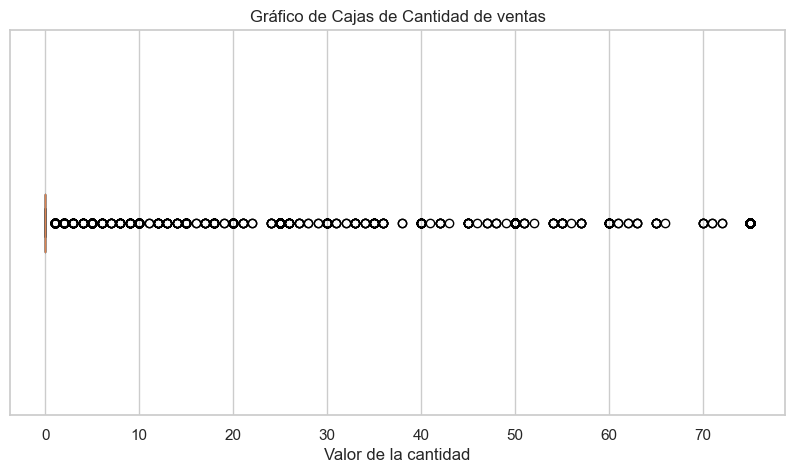

In [87]:
data_filtered = ventas_df.loc[ventas_df["CANTIDAD"] <= (q3 + 1.5 * iqr)]["CANTIDAD"]


plt.figure(figsize=(10, 5))
plt.boxplot(data_filtered, vert=False)  


plt.title("Gráfico de Cajas de Cantidad de ventas")
plt.xlabel("Valor de la cantidad")
plt.yticks([]) 

plt.show()


Se presentan sobre el diagrama de cajas un alto valor de outliers debido a la cantidad de valores minimos presente sobre la muestra.

## TIPO

In [88]:
#Verificamos el tipo de registro
print(Operación_df["TIPO"].unique())

['VENTAS' 'COMPRAS' 'INVENTARIO']


In [89]:
# Calculando la frecuencia relativa
Operación_df["TIPO"].value_counts(dropna=False, normalize=True)

VENTAS        0.342857
INVENTARIO    0.342857
COMPRAS       0.314286
Name: TIPO, dtype: float64

La frecuencia es similar debido que es la misma cantidad de articulos revisada, lo que visualiza que la cantidad de datos suministrada es concisa, este es el tipo de información con la que se cuenta, la grafica corrobora que se cuenta con la misma cantidad de datos de ventas, compras e inventario para cada articulo.

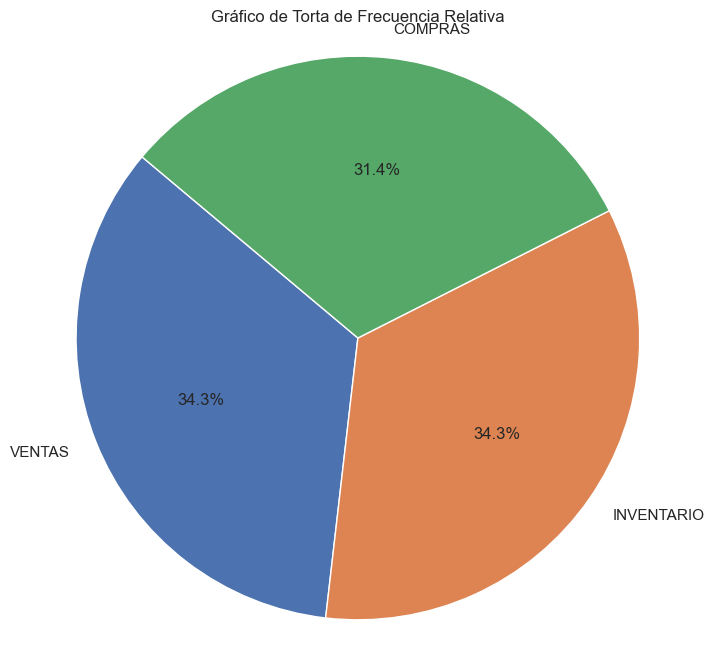

In [90]:
# Creamos un gráfico de torta para revisar la distribución
frecuencia_relativa = Operación_df["TIPO"].value_counts(dropna=False, normalize=True)
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_relativa, labels=frecuencia_relativa.index, autopct='%1.1f%%', startangle=140)
plt.title("Gráfico de Torta de Frecuencia Relativa")
plt.axis('equal')  # To ensure that the graph is circular

plt.show()

La distribución de los datos es similar, sin embargo, para efectos del análisis debería ser la misma proporción para los tres tipos de variable, sin embargo, esto se debe a la eliminación de duplicados y valores atípicos aplicados en el modelo anteriormente.

## 2. Análisis Bivariado

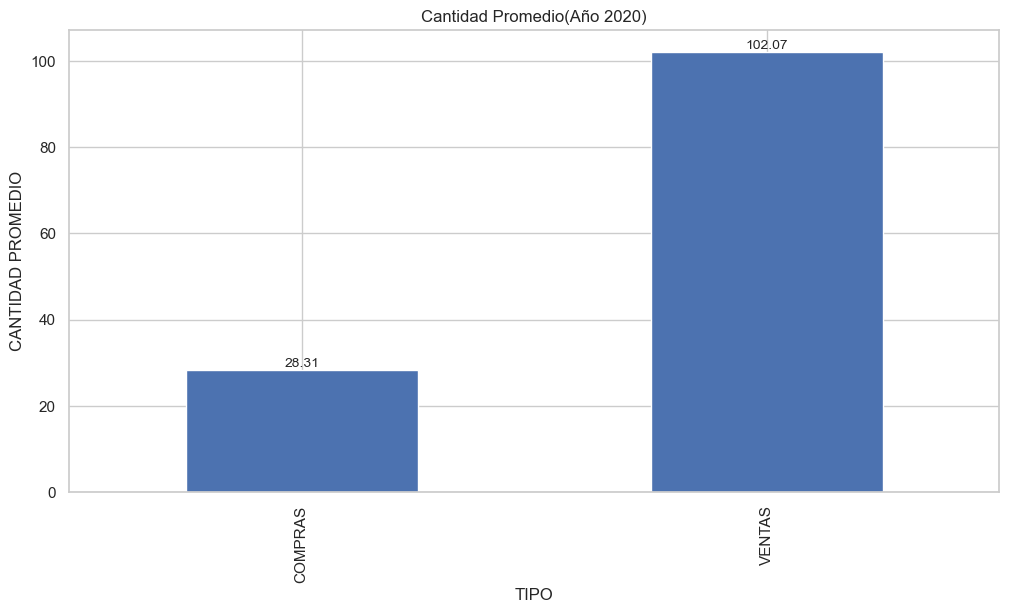

In [91]:

datos_2020 = Operación_df[Operación_df['AÑO'] == 2020]
datos_2020 = datos_2020[datos_2020['TIPO']!='INVENTARIO']


media_por_tipo = datos_2020.groupby('TIPO')['CANTIDAD'].mean()


plt.figure(figsize=(12, 6))
ax = media_por_tipo.plot(kind='bar')
plt.title("Cantidad Promedio(Año 2020)")
plt.xlabel("TIPO")
plt.ylabel("CANTIDAD PROMEDIO")
plt.xticks(rotation=90)  

for i, v in enumerate(media_por_tipo):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

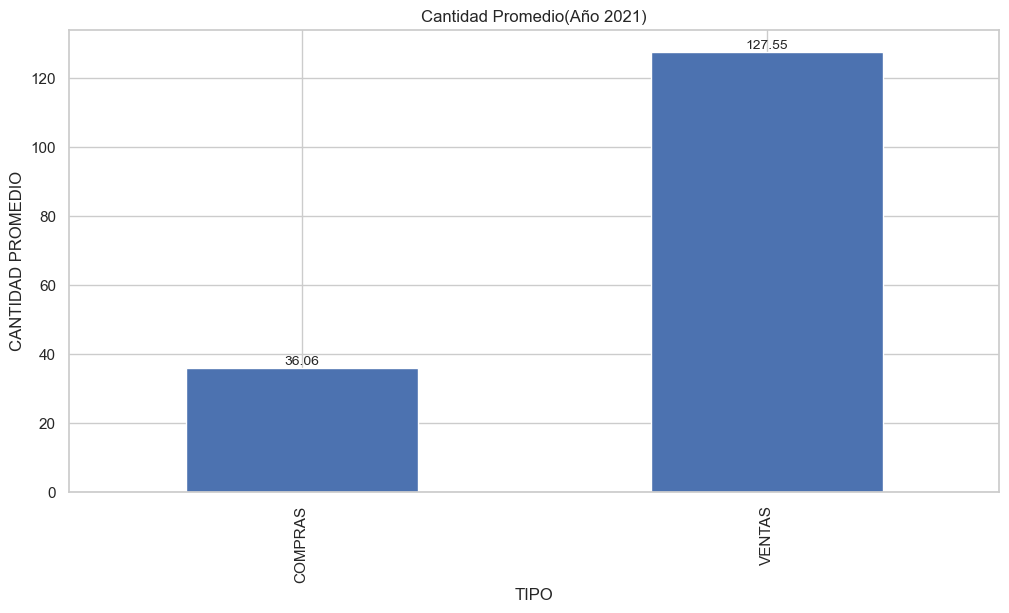

In [92]:

datos_2021 = Operación_df[Operación_df['AÑO'] == 2021]
datos_2021 = datos_2021[datos_2021['TIPO']!='INVENTARIO']


media_por_tipo = datos_2021.groupby('TIPO')['CANTIDAD'].mean()


plt.figure(figsize=(12, 6))
ax = media_por_tipo.plot(kind='bar')
plt.title("Cantidad Promedio(Año 2021)")
plt.xlabel("TIPO")
plt.ylabel("CANTIDAD PROMEDIO")
plt.xticks(rotation=90)  


for i, v in enumerate(media_por_tipo):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

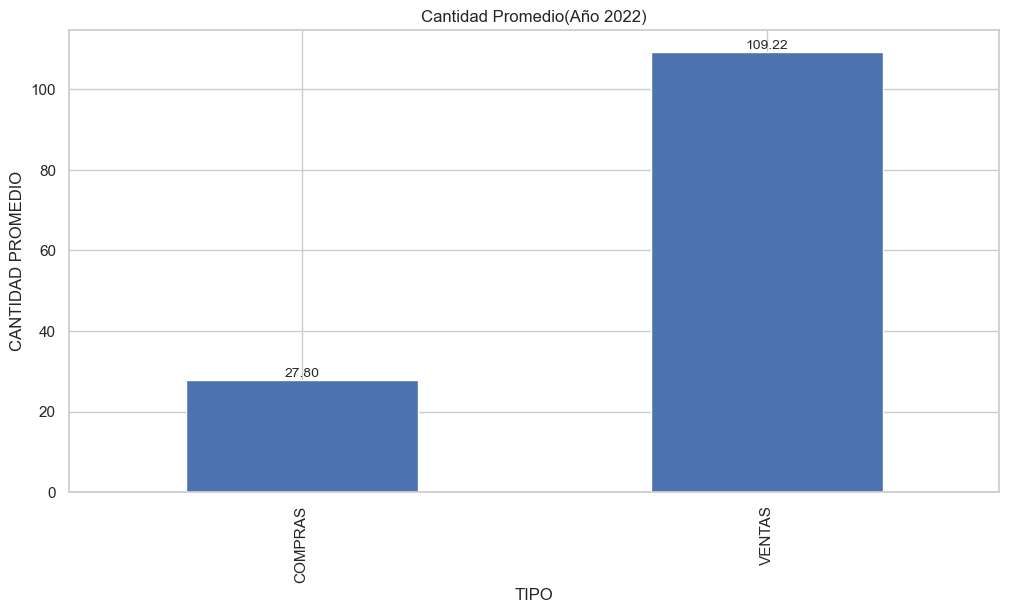

In [93]:

datos_2022 = Operación_df[Operación_df['AÑO'] == 2022]
datos_2022 = datos_2022[datos_2022['TIPO']!='INVENTARIO']


media_por_tipo = datos_2022.groupby('TIPO')['CANTIDAD'].mean()

plt.figure(figsize=(12, 6))
ax = media_por_tipo.plot(kind='bar')
plt.title("Cantidad Promedio(Año 2022)")
plt.xlabel("TIPO")
plt.ylabel("CANTIDAD PROMEDIO")
plt.xticks(rotation=90) 


for i, v in enumerate(media_por_tipo):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

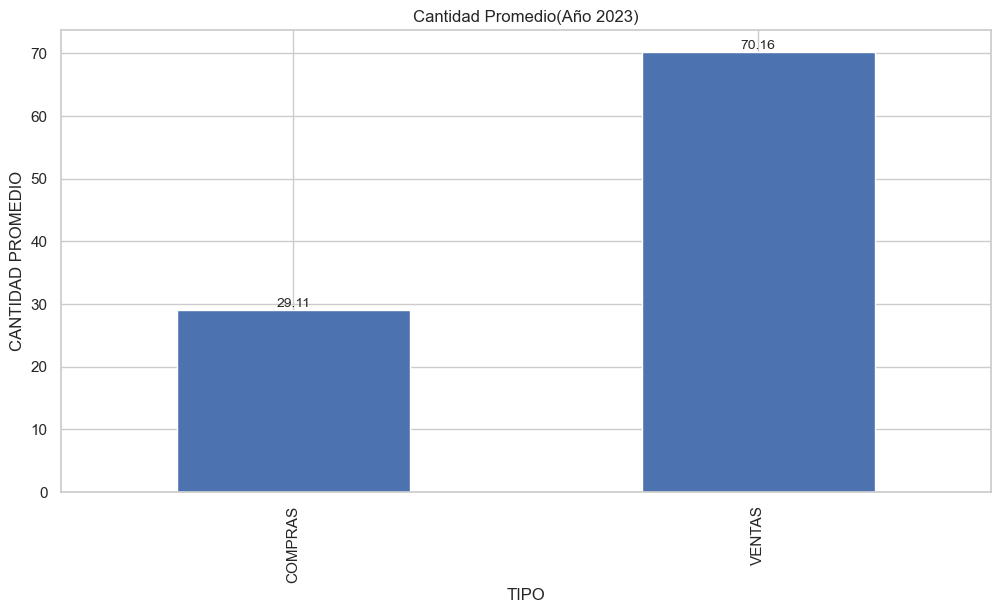

In [94]:

datos_2023 = Operación_df[Operación_df['AÑO'] == 2023]
datos_2023 = datos_2023[datos_2023['TIPO']!='INVENTARIO']


media_por_tipo = datos_2023.groupby('TIPO')['CANTIDAD'].mean()


plt.figure(figsize=(12, 6))
ax = media_por_tipo.plot(kind='bar')
plt.title("Cantidad Promedio(Año 2023)")
plt.xlabel("TIPO")
plt.ylabel("CANTIDAD PROMEDIO")
plt.xticks(rotation=90)  


for i, v in enumerate(media_por_tipo):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

Como se puede observar se vende más de lo que se compra lo que sugiere a que la empresa tiene un stock represado haciendo que el índice de rotación sea negativo para la mayoría de articulos. Asimismo, luego de revisar cada año se puede observar que la compañia cuenta con un stock suficiente para realizar mayor cantidad de transacciones de ventas que de compras, lo que le da la posibilidad de ir controlando su inventario en relación a su transaccionalidad de venta para cada articulo

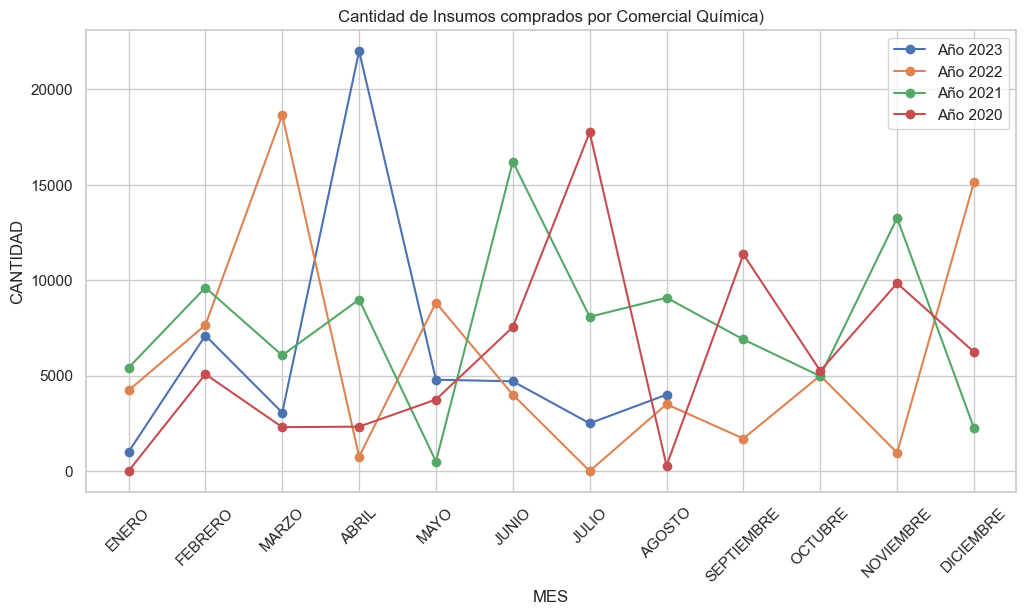

In [95]:

años_interés = Operación_df["AÑO"].unique()


plt.figure(figsize=(12, 6))
for año in años_interés:
    compras_df = Operación_df[(Operación_df['AÑO'] == año) & (Operación_df['TIPO'] == 'COMPRAS')]

    
    suma_por_mes = compras_df.groupby('MES')['CANTIDAD'].sum()

  
    suma_por_mes = suma_por_mes.reindex(month_list)

  
    plt.plot(suma_por_mes.index, suma_por_mes.values, marker='o', linestyle='-', label=f'Año {año}')

plt.title("Cantidad de Insumos comprados por Comercial Química)")
plt.xlabel("MES")
plt.ylabel("CANTIDAD")
plt.xticks(rotation=45) 
plt.legend()

plt.show()

La compra de mayor valor se ejecuto este año hacia el mes de Abril, que genero un pico en la grafica, uno de los años con mas estabilidad en la transaccionalidad es el 2021,para el año 2023, se cuentan con datos hasta la fecha.

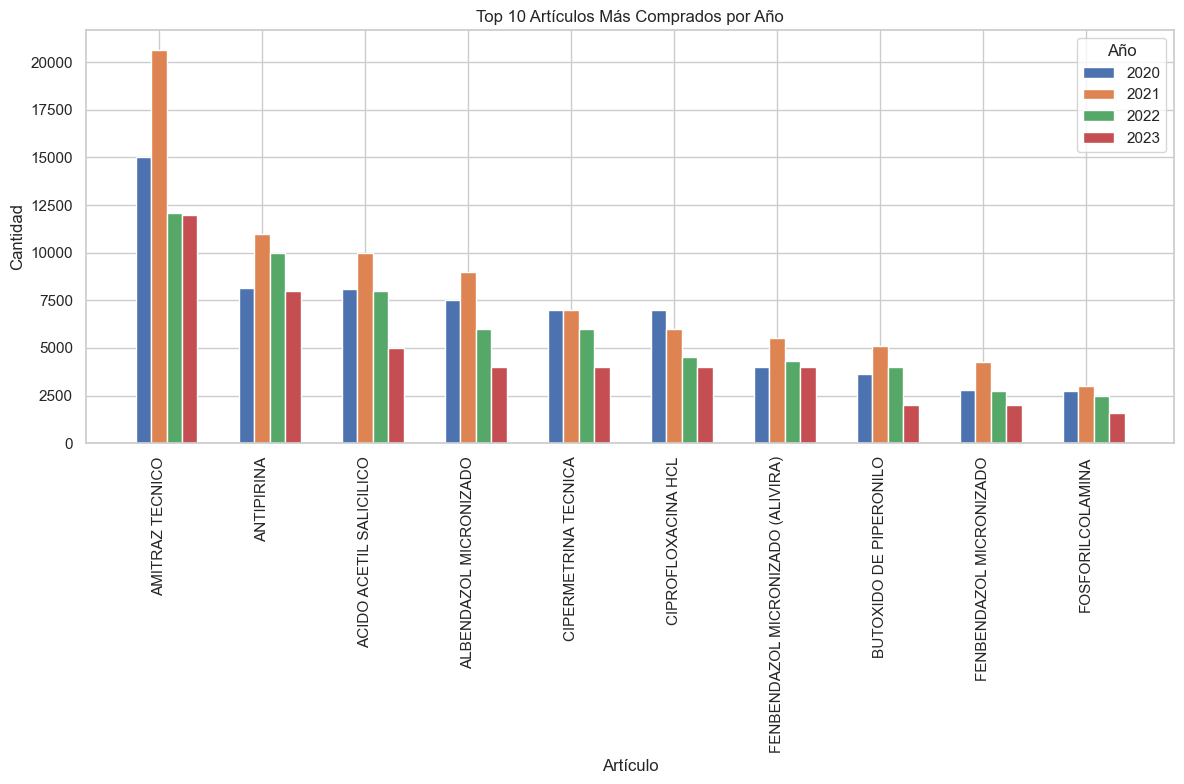

In [96]:

compras_df = Operación_df[Operación_df['TIPO'] == 'COMPRAS']


compras_por_año = compras_df.groupby(['AÑO', 'DESCRIPCIÓN DEL ARTICULO'])['CANTIDAD'].sum().reset_index()


articulos_mas_comprados_por_año = compras_por_año.groupby('AÑO').apply(lambda x: x.nlargest(10, 'CANTIDAD')).reset_index(drop=True)


plt.figure(figsize=(12, 8))


años_unicos = articulos_mas_comprados_por_año['AÑO'].unique()


ancho_barra = 0.15

for i, año in enumerate(años_unicos):
    data = articulos_mas_comprados_por_año[articulos_mas_comprados_por_año['AÑO'] == año]
    posiciones_x = range(len(data))
    posiciones_x = [x + i * ancho_barra for x in posiciones_x]

    plt.bar(posiciones_x, data['CANTIDAD'], width=ancho_barra, label=str(año))


plt.xlabel('Artículo')
plt.ylabel('Cantidad')
plt.title('Top 10 Artículos Más Comprados por Año')
plt.xticks([r + ancho_barra for r in range(len(data))], data['DESCRIPCIÓN DEL ARTICULO'], rotation=90)
plt.legend(title='Año')


plt.tight_layout()
plt.show()

Los medicamentos más comprados son Amitraz Técnico y Antipirina y los años en los cuáles se compró una mayor cantidad fue el año 2021.

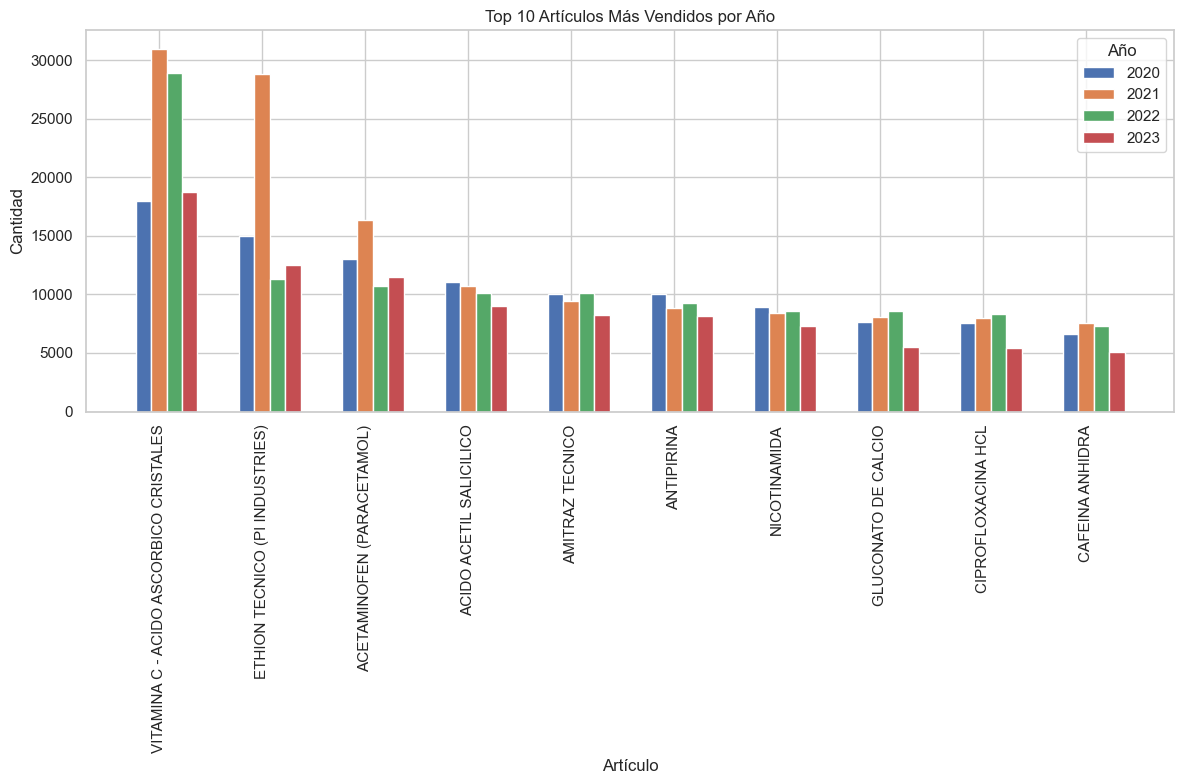

In [97]:

ventas_df = Operación_df[Operación_df['TIPO'] == 'VENTAS']


ventas_por_año = ventas_df.groupby(['AÑO', 'DESCRIPCIÓN DEL ARTICULO'])['CANTIDAD'].sum().reset_index()


articulos_mas_vendidos_por_año = ventas_por_año.groupby('AÑO').apply(lambda x: x.nlargest(10, 'CANTIDAD')).reset_index(drop=True)


plt.figure(figsize=(12, 8))


años_unicos = articulos_mas_vendidos_por_año['AÑO'].unique()


ancho_barra = 0.15


for i, año in enumerate(años_unicos):
    data = articulos_mas_vendidos_por_año[articulos_mas_vendidos_por_año['AÑO'] == año]
    posiciones_x = range(len(data))
    posiciones_x = [x + i * ancho_barra for x in posiciones_x]

    plt.bar(posiciones_x, data['CANTIDAD'], width=ancho_barra, label=str(año))


plt.xlabel('Artículo')
plt.ylabel('Cantidad')
plt.title('Top 10 Artículos Más Vendidos por Año')
plt.xticks([r + ancho_barra for r in range(len(data))], data['DESCRIPCIÓN DEL ARTICULO'], rotation=90)
plt.legend(title='Año')


plt.tight_layout()
plt.show()

Los medicamentos más vendidos fueron la vitamina C y el Ethion principalmente en 2021.